In [ ]:
!pip install pandas_datareader --upgrade

     |████████████████████████████████| 109 kB 6.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


# ***Some Useful Pandas Tools***

## **Changing an index to datetime**

In [ ]:
df.index = pd.to_datetime(df.index)

## **Plotting Data**

In [ ]:
df.plot()

## **Join two DataFrames**

In [ ]:
df1.join(df2)

## **Resample data (e.g. from daily to weekly)**


In [ ]:
df = df.resample(rule='W', how='last')

## **Computing percent changes**

In [ ]:
df['col'].pct_change()

## **differences of a time series**


In [ ]:
df['col'].diff()

## **Correlation between two series**

In [ ]:
df['ABC'].corr(df['XYZ'])

## **Autocorrelation**


In [ ]:
df['ABC'].autocorr()

### ***A "Thin" Application of Time Series***

[Google Trends](https://trends.google.com/trends/) allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet", which is pre-loaded in a DataFrame called `diet`. A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "`diet`" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

Like many time series datasets you will be working with, ***the index of dates are strings and should be converted to a datetime index*** before plotting.

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the pandas basics [Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/fbc502d0-46b2-4e1b-b6b0-5402ff273251) and keep it handy!

* Convert the date index to datetime using pandas's `to_datetime()`.
* Plot the time series and set the argument `grid` to `True` to better see the year-ends.
* Slice the `diet` dataset to keep only values from 2012, assigning to `diet2012`.
* Plot the `diet2012`, again creating gridlines with the `grid` argument.

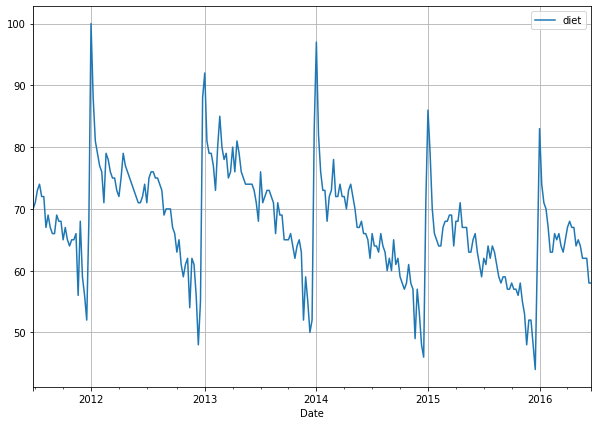

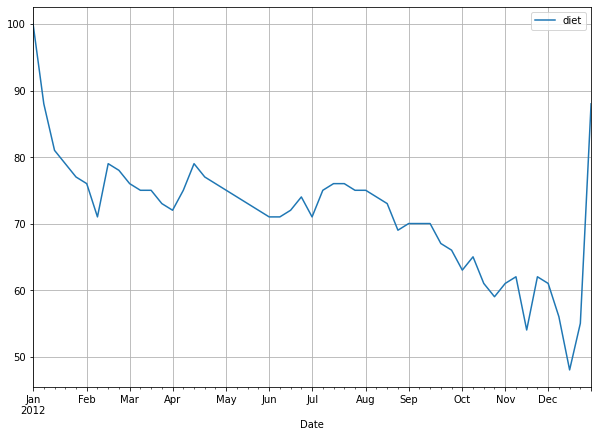

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

diet = pd.read_csv('diet.csv', index_col=['Date'])
##############################################################################

# From previous step
diet.index = pd.to_datetime(diet.index)

# Plot the entire time series diet and show gridlines
diet.plot(grid=True, figsize=(10,7))
plt.show()

# Slice the dataset to keep only 2012
diet2012 = diet['2012']

# Plot 2012 data
diet2012.plot(grid=True, figsize=(10,7))
plt.show()

### ***Merging Time Series With Different Dates***

Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way ***to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets***.

The pandas **`.join()`** method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.

Stock prices and 10-year US Government bond yields, which were downloaded from [FRED](https://fred.stlouisfed.org/), are pre-loaded in DataFrames `stocks` and `bonds`.

* Convert the dates in the `stocks.index` and `bonds.index` into sets.
* Take the difference of the stock set minus the bond set to get those dates where the stock market has data but the bond market does not.
* Merge the two DataFrames into a new DataFrame, `stocks_and_bonds` using the **`.join()`** method, which has the syntax **`df1.join(df2)`**.
* To get the intersection of dates, use the argument **`how='inner'`**.

In [ ]:
from pandas_datareader.data import DataReader
from datetime import date, datetime
import matplotlib.pyplot as plt

# Be careful.  Data available from FRED for SP500 is only 10 years back.
stocks = DataReader('SP500', 'fred', '2012-01-20').dropna()
bonds  = DataReader('DGS10', 'fred', '2012-01-20').dropna()

###############################################################################
###############################################################################

# Import pandas
import pandas as pd

# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates, "\n\n")

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how='inner')
stocks_and_bonds.head()

{Timestamp('2013-11-11 00:00:00'), Timestamp('2018-11-12 00:00:00'), Timestamp('2015-10-12 00:00:00'), Timestamp('2015-11-11 00:00:00'), Timestamp('2020-11-11 00:00:00'), Timestamp('2014-11-11 00:00:00'), Timestamp('2021-11-11 00:00:00'), Timestamp('2018-10-08 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2012-10-08 00:00:00'), Timestamp('2012-11-12 00:00:00'), Timestamp('2019-10-14 00:00:00'), Timestamp('2019-11-11 00:00:00'), Timestamp('2016-10-10 00:00:00'), Timestamp('2022-01-19 00:00:00'), Timestamp('2016-11-11 00:00:00'), Timestamp('2017-10-09 00:00:00'), Timestamp('2014-10-13 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2013-10-14 00:00:00')} 




,SP500,DGS10
DATE,,
2012-01-20,1315.38,2.05
2012-01-23,1316.00,2.09
2012-01-24,1314.65,2.08
2012-01-25,1326.05,2.01
2012-01-26,1318.43,1.96


# ***Correlation of Two Time Series***

* Plot of **S&P500** and **JPMorgan** stock

In [ ]:
from pandas_datareader import get_data_yahoo

jpm = get_data_yahoo('JPM', '2012-01-20')

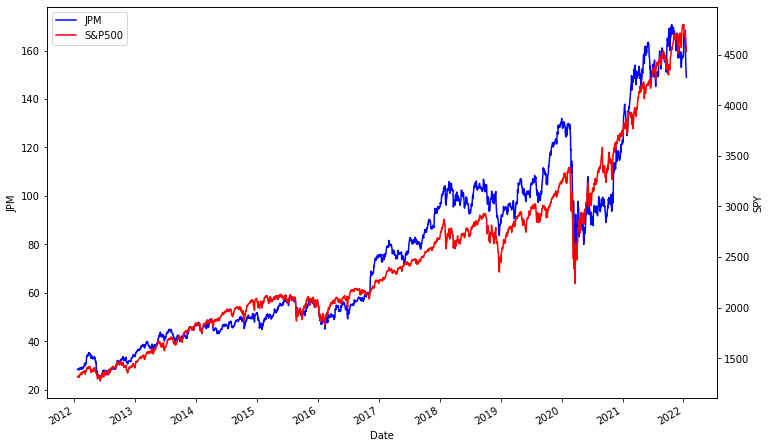

In [ ]:
import matplotlib.pyplot as plt

# Display the option values array
fig, ax = plt.subplots(figsize=(12,8))
ax  = jpm['Adj Close'].plot(color='blue', label='JPM')
ax2 = stocks['SP500'].plot(color = "red", label="S&P500", secondary_y=True)
ax.set_xlabel('Date')
ax.set_ylabel('JPM')
ax2.set_ylabel('SPY')

# โค้ดนี้มีไว้เพราะถ้าไม่มี บางที legend มันจะหายไปหนึ่งตัว เพราะอะไรไม่รู้
handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)
plt.show()

When the market (S&P500) drops, JP Morgan drops as well, and when the market (S&P500) rises, JP Morgan also rises.

# ***Scatter Plot for Returns of two series***

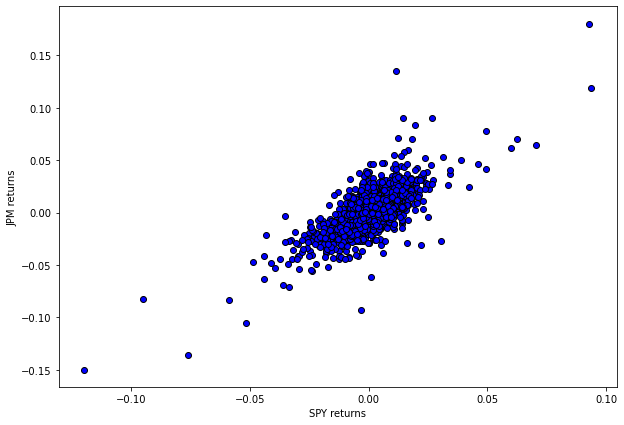

Correlation of SP500 and JP Morgan  = 0.75


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(stocks['SP500'].pct_change(), jpm['Adj Close'].pct_change(), color='blue', edgecolors='black')
plt.xlabel('SPY returns')
plt.ylabel('JPM returns')
plt.show()

print(f"Correlation of SP500 and JP Morgan  = {stocks['SP500'].pct_change().corr(jpm['Adj Close'].pct_change()):.2f}")

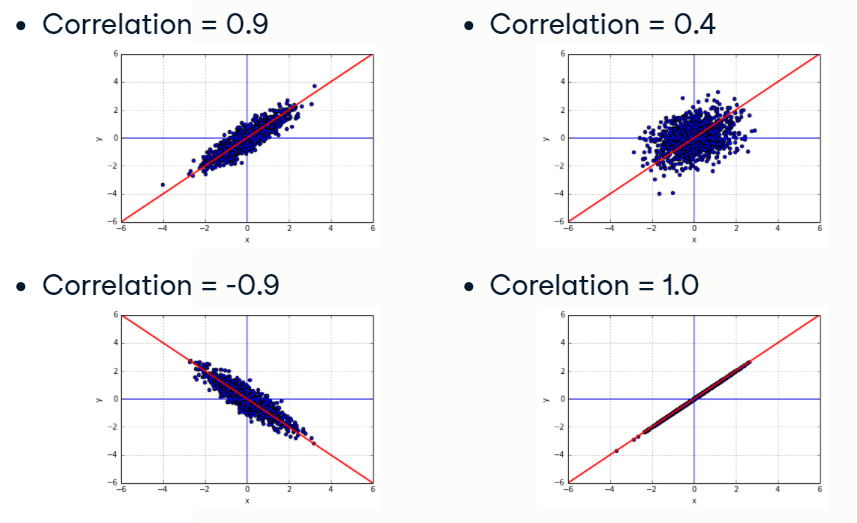



# ***Common Mistake: Correlation of Two Trending Series***

* Even if the two series are totally unrelated, you could still get a very high correlation.

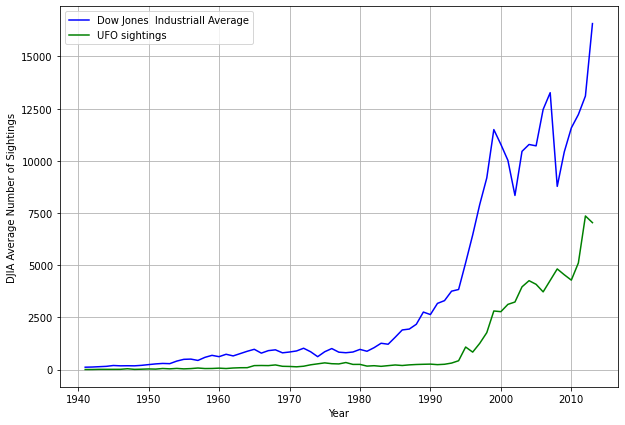

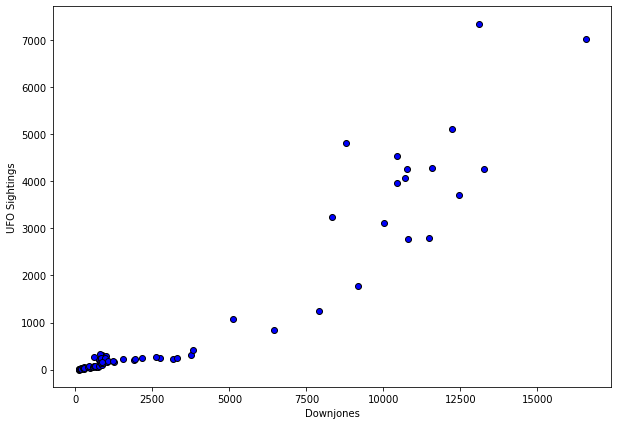

Correlation of Downlones and UFO sightings = 0.94


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dji = pd.read_csv('DJI.csv', index_col=['Date'])
ufo = pd.read_csv('UFO.csv', index_col=['Date'])


# Display the option values array
fig, ax = plt.subplots(figsize=(10,7))
ax  = dji['Value'].plot(color='blue', label='Dow Jones  Industriall Average')
ax2 = ufo['Value'].plot(color = "green", label="UFO sightings")
ax.set_xlabel('Year')
ax.set_ylabel('DJIA Average Number of Sightings')
plt.legend()
ax.grid()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(dji['Value'], ufo['Value'], color='blue', edgecolors='black')
plt.xlabel('Downjones')
plt.ylabel('UFO Sightings')
plt.show()

print(f"Correlation of Downlones and UFO sightings = {dji['Value'].corr(ufo['Value']):.2f}")

## ***Look at the correlation of their first difference (returns) instead***

* That's why, when you look at the correlation of say, two stocks, you should look at the correlation of their *returns*, not their levels.

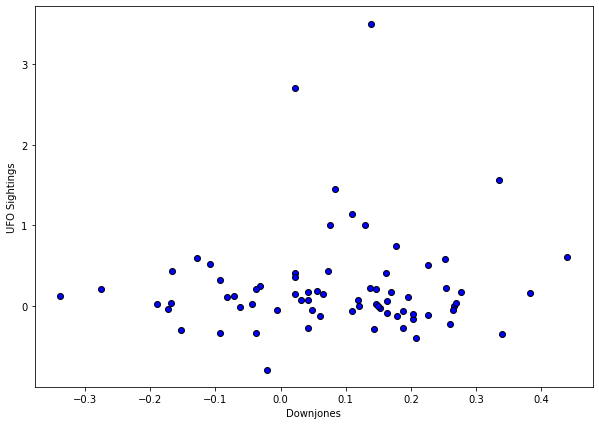

Correlation of Downlones 1st difference and UFO sightings 1st difference= 0.06


In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(dji['Value'].pct_change(), ufo['Value'].pct_change(), color='blue', edgecolors='black')
plt.xlabel('Downjones')
plt.ylabel('UFO Sightings')
plt.show()

print(f"Correlation of Downlones 1st difference and UFO sightings 1st difference= {dji['Value'].pct_change().corr(ufo['Value'].pct_change()):.2f}")

### ***Correlation of Stocks and Bonds*** 

Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the <ins>*correlations on the percentage changes rather than the levels*</ins>.

Stock prices and 10-year bond yields are combined in a DataFrame called `stocks_and_bonds` under columns `SP500` and `US10Y`

* Compute percent changes on the `stocks_and_bonds` DataFrame using the .`pct_change()` method and call the new DataFrame returns.
* Compute the correlation of the columns `SP500` and `US10Y` in the returns DataFrame using the `.corr()` method for Series which has the syntax `series1.corr(series2)`.
* Show a scatter plot of the percentage change in stock and bond yields.

{Timestamp('2013-11-11 00:00:00'), Timestamp('2018-11-12 00:00:00'), Timestamp('2015-10-12 00:00:00'), Timestamp('2015-11-11 00:00:00'), Timestamp('2020-11-11 00:00:00'), Timestamp('2014-11-11 00:00:00'), Timestamp('2021-11-11 00:00:00'), Timestamp('2018-10-08 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2012-10-08 00:00:00'), Timestamp('2012-11-12 00:00:00'), Timestamp('2019-10-14 00:00:00'), Timestamp('2019-11-11 00:00:00'), Timestamp('2016-10-10 00:00:00'), Timestamp('2022-01-19 00:00:00'), Timestamp('2016-11-11 00:00:00'), Timestamp('2017-10-09 00:00:00'), Timestamp('2014-10-13 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2013-10-14 00:00:00')} 


Correlation of stocks and interest rates:  0.4051305930022711


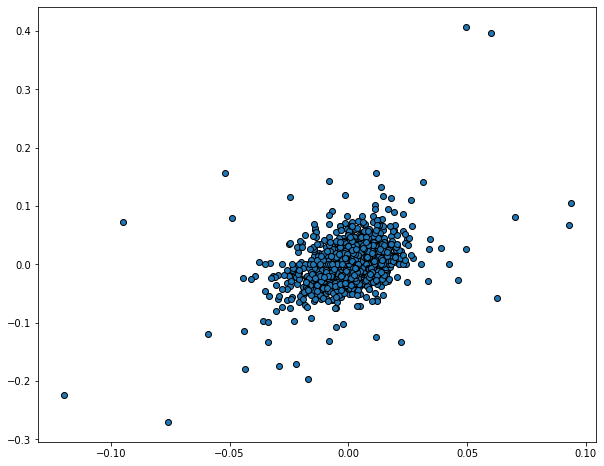

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

# Be careful.  Data available from FRED for SP500 is only 10 years back.
stocks = DataReader('SP500', 'fred', '2012-01-20').dropna()
bonds  = DataReader('DGS10', 'fred', '2012-01-20').dropna()

# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates, "\n\n")

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how='inner')
stocks_and_bonds.rename(columns={'DGS10':'US10Y'}, inplace=True)
###############################################################################
###############################################################################

# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns['SP500'], returns['US10Y'], edgecolors='black')
plt.show()

The positive correlation means that when interest rates go down, stock prices go down. For example, during crises like 9/11, investors sold stocks and moved their money to less risky bonds (this is sometimes referred to as a 'flight to quality'). During these periods, stocks drop and interest rates drop as well. Of course, there are times when the opposite relationship holds too.

### ***Flying Saucers Aren't Correlated to Flying Markets*** (Already done above)

Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as ***"spurious correlation"***. That's why when you look at the correlation of say, two stocks, <ins>*you should look at the correlation of their returns and not their levels*</ins>.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

The DataFrame levels contains the levels of DJI and UFO. UFO data was downloaded from [www.nuforc.org](http://www.nuforc.org/).


* Calculate the correlation of the columns `DJI` and `UFO`.
* Create a new DataFrame of changes using the **`.pct_change()`** method.
* Re-calculate the correlation of the columns `DJI` and `UFO` on the changes.

In [ ]:
import pandas as pd

dji = pd.read_csv('DJI.csv', index_col=['Date'])
ufo = pd.read_csv('UFO.csv', index_col=['Date'])
levels = dji.merge(ufo, left_index=True, right_index=True)
levels.rename(columns={'Value_x':'DJI', 'Value_y':'UFO'}, inplace=True)

###############################################################################
###############################################################################

# Compute correlation of levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


Notice that the correlation on levels is high but the correlation on changes is close to zero.

# ***Python Packages to Perform OLS***

* In `statsmodels`:

In [ ]:
import statsmodels.api as sm
sm.OLS(y, x).fit()

* In `numpy`

In [ ]:
np.polyfit(x, y, deg=1)

* In `pandas`:

In [ ]:
pd.ols(y, x)

* In `scipy`:

In [ ]:
from scipy import stats
stats.linregress(x, y)

### ***Looking at a Regression's R-Squared***

R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the ***magnitude of the correlation is the square root of the R-squared*** and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package **`statsmodels`**.

You will take two series, `x` and `y`, compute their correlation, and then regress `y` on `x` using the function **`OLS(y,x)`** in the **`statsmodels.api`** library (note that the dependent, or right-hand side variable `y` is the first argument). Most linear regressions contain a constant term which is the intercept (the $\alpha$ in the regression $y_t = \alpha + \beta x_t + \varepsilon_t$). To include a constant using the function `OLS()`, you need to add a column of 1's to the right hand side of the regression.

The module `statsmodels.api` has been imported for you as `sm`.

* Compute the correlation between `x` and `y` using the **`.corr()`** method.
* Run a regression:
  * First convert the Series `x` to a DataFrame `dfx`.
  * Add a constant using **`sm.add_constant()`**, assigning it to `dfx1`
  * Regress `y` on `dfx1` using **`sm.OLS().fit()`**.
* Print out the results of the regression and compare the R-squared with the correlation.

In [ ]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('OLS_1.csv').drop(columns='Unnamed: 0')
x, y = df['x'], df['y']

###############################################################################
###############################################################################

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

display(dfx1.head())

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print("\n\n", result.summary())

The correlation between x and y is -0.90


,const,x
0,1.0,1.281155
1,1.0,-0.612631
2,1.0,0.933222
3,1.0,2.269327
4,1.0,-1.427691




                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Thu, 20 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:41:44   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.013     -0.391      

# ***Autocorrelation***

* Negative: Mean Reverting Series

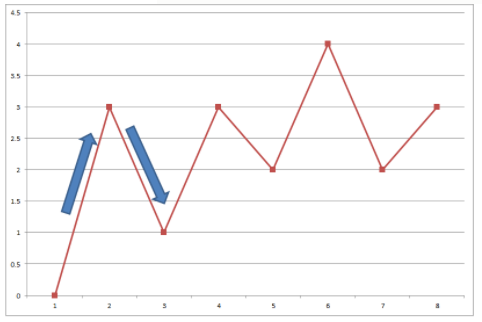

* Positive: Trend Following

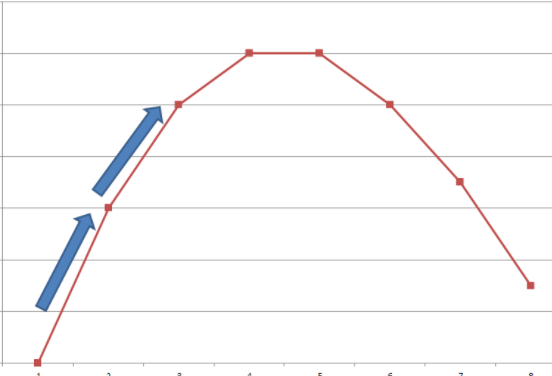



## ***Example of Positive Autocorrelation: Exchange Rates***

The autocorrelation is:  -0.012547228483935451


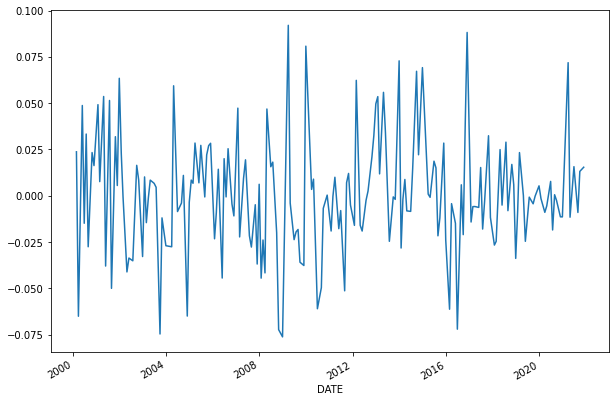

In [ ]:
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
import pandas as pd

df = DataReader('DEXJPUS', 'fred', '2000-01-01').dropna()

# Convert index to datetime
df.index = pd.to_datetime(df.index)

# Downsample from daily to monthly data
df = df.resample(rule='M', convention='end').asfreq().dropna()

# Compute returns from prices
df['Return'] = df['DEXJPUS'].pct_change()

# Compute autocorrelation
autocorrelation = df['Return'].autocorr()
print("The autocorrelation is: ",autocorrelation)

df['Return'].plot(figsize=(10, 7))
plt.show()

### ***A Popular Strategy Using Autocorrelation***

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as ***mean reversion*** in stock prices: 

* prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. 

A more mathematical way to describe mean reversion is to say that ***stock returns are negatively autocorrelated***.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see [here](https://www.quantopian.com/posts/enhancing-short-term-mean-reversion-strategies-1).

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. You'll start with a DataFrame `MSFT` of daily prices. You should use the **`.resample()`** method to get weekly prices and then compute returns from prices. Use the pandas method **`.autocorr()`** to get the autocorrelation and show that the autocorrelation is negative. Note that the **`.autocorr()`** method only works on ***Series***, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

* Use the **`.resample()`** method with **`rule='W'`** and **`how='last'`** to convert daily data to weekly data.
  * The argument **`how`** in **`.resample()`** has been deprecated.
  * The new syntax **`.resample().last()`** also works.
* Create a new DataFrame, returns, of percent changes in weekly prices using the **`.pct_change()`** method.
* Compute the autocorrelation using the **`.autocorr()`** method on the series of closing stock prices, which is the column `'Adj Close'` in the DataFrame `returns`.

In [ ]:
import pandas as pd

MSFT = pd.read_csv('MSFT.csv', index_col='Date', parse_dates=['Date'])

###############################################################################

# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


### ***Are Interest Rates Autocorrelated?***

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

The DataFrame `daily_rates` contains daily data of 10-year interest rates from 1962 to 2017.

* Create a new DataFrame, `daily_diff`, of changes in daily rates using the **`.diff()`** method.
* Compute the autocorrelation of the column `'US10Y'` in `daily_diff` using the `.autocorr()` method.
* Use the **`.resample()`** method with arguments **`rule='A'`** to convert to annual frequency.
  * The new syntax **`.resample().last()`** also works.
* Create a new DataFrame, `yearly_diff` of changes in annual rates and compute the autocorrelation, as above.

In [ ]:
from pandas_datareader.data import DataReader

daily_rates  = DataReader('DGS10', 'fred', '1962-01-02').dropna()
daily_rates.rename(columns={'DGS10':'US10Y'}, inplace=True)

#############################################################################
#############################################################################

# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is 0.07
The autocorrelation of annual interest rate changes is -0.21


Notice how the daily autocorrelation is small but the annual autocorrelation is large and negative.

# ***Autocorrelation Function: ACF***

* A function of the lag

## ***ACF Example 1: Simple Autocorrelation Function***

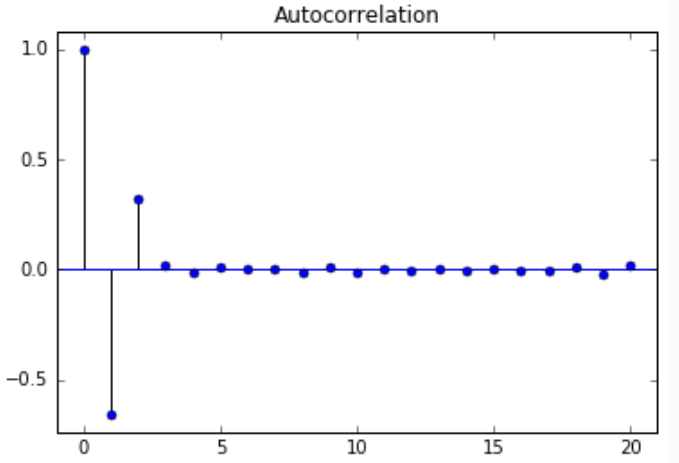

* จากภาพข้างบนนี้ เราสามารถใช้ $y_{t-1}, y_{t-2}$ มาทำนายค่า $y_{t+1}$ ได้

## ***ACF Example 2: Seasonal Earnings***

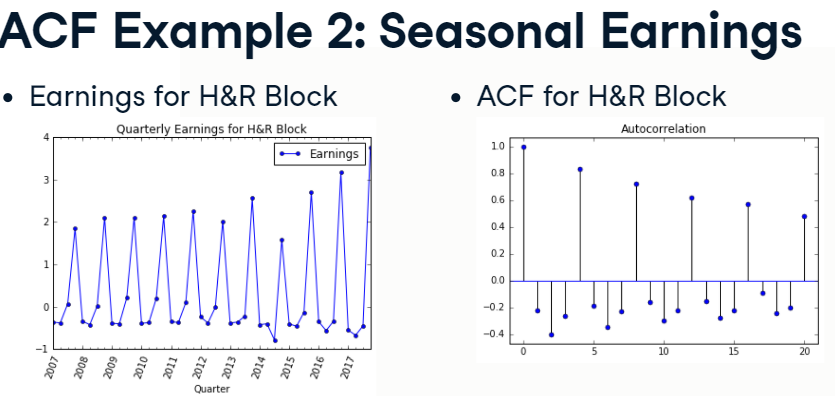

## ***ACF Example 3: Useful for Model Selection***

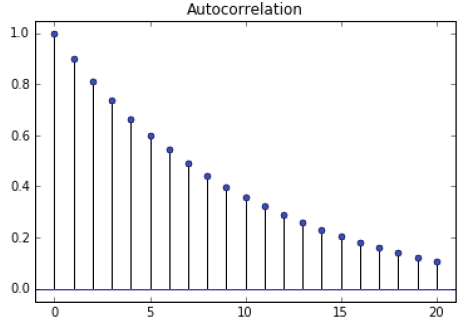

# ***Plot ACF in Python***


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# x is time-series
# lags คือจำนวนแล็กที่ต้องการพล็อตในกราฟ
# alpha คือ ความกว้างของช่วงความเชื่อมั่น

plot_acf(x, lags=20, alpha=0.05)

# ***Confidence Interval of ACF***

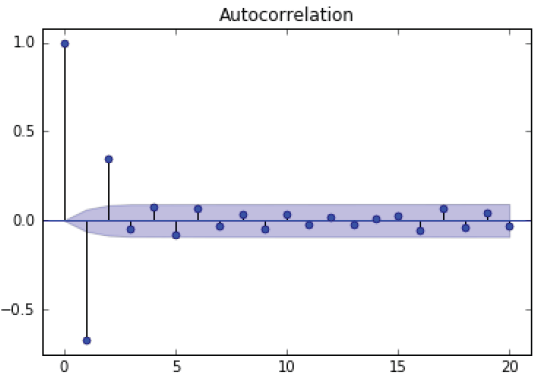

* **Example**: `alpha=0.05`
  * 5% chance that if true autocorrelation is zero, it will fall
outside blue band

# ***ACF Values Instead of Plot***



In [ ]:
from statsmodels.tsa.stattools import acf

print(acf(x))

### ***Taxing Exercise: Compute the ACF***

In the last chapter, you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. The quarterly earnings for ***H&R Block*** (ticker symbol `HRB`) is plotted on the right, and you can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.

You will compute the array of autocorrelations for the H&R Block quarterly earnings that is pre-loaded in the DataFrame `HRB`. Then, plot the autocorrelation function using the **`plot_acf`** module. This plot shows what the autocorrelation function looks like for cyclical earnings data. The ACF at `lag=0` is always one, of course. In the next exercise, you will learn about the confidence interval for the ACF, but for now, suppress the confidence interval by setting `alpha=1`.


* Import the **`acf`** module and **`plot_acf`** module from **`statsmodels`**.
* Compute the array of autocorrelations of the quarterly earnings data in DataFrame `HRB`.
* Plot the autocorrelation function of the quarterly earnings data in `HRB`, and pass the argument `alpha=1` to suppress the confidence interval.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


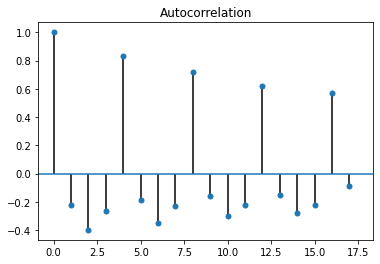

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

HRB = pd.read_csv('HRB.csv', index_col='Quarter', parse_dates=True)

###############################################################################
###############################################################################

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

Notice the strong positive autocorrelation at lags 4, 8, 12, 16,20,...

### ***Are We Confident This Stock is Mean Reverting?***

In the last chapter, you saw that the autocorrelation of `MSFT`'s weekly stock returns was `-0.16`. That autocorrelation seems large, but is it statistically significant? In other words, ***can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero?*** And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, <ins>*in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero.*</ins> In fact, the standard deviation of the sample autocorrelation is $\frac{1}{\sqrt N}$  where  $N$ is the number of observations, so if , for example, the standard deviation of the ACF is `0.1`, and since 95% of a normal curve is between `+1.96` and `-1.96` standard deviations from the mean, the 95% confidence interval is $\pm \frac{1.96}{\sqrt N}. This approximation only holds when the true autocorrelations are *all zero*.

You will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one autocorrelation of -0.16 from the last chapter. The weekly returns of Microsoft is pre-loaded in a DataFrame called `returns`.

* Recompute the autocorrelation of weekly returns in the Series `'Adj Close'` in the `returns` DataFrame.
* Find the number of observations in the returns DataFrame using the `len()` function.
* Approximate the 95% confidence interval of the estimated autocorrelation. The `math` function `sqrt()` has been imported and can be used.
* Plot the autocorrelation function of `returns` using **`plot_acf`** that was imported from **`statsmodels`**. Set `alpha=0.05` for the confidence intervals (that's the default) and `lags=20`.

The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


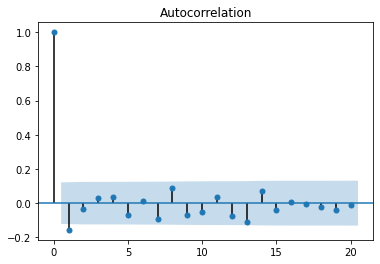

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt
import matplotlib.pyplot as plt

MSFT = pd.read_csv('MSFT.csv', index_col='Date', parse_dates=['Date'])

# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change().dropna()  # plot_acf won't work without dropna()
###############################################################################
###############################################################################

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

Notice that the autocorrelation with lag `1` is significantly negative, but none of the other lags are significantly different from zero.

# ***Simulating White Noise***


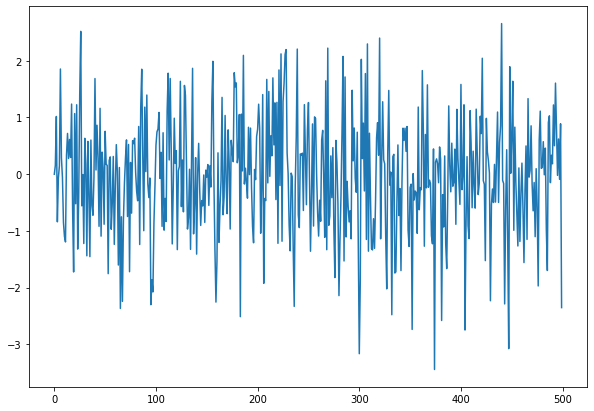

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 7))

noise = np.random.normal(loc=0, scale=1, size=500)
plt.plot(noise)
plt.show()

# ***Autocorrelation of White Noise***


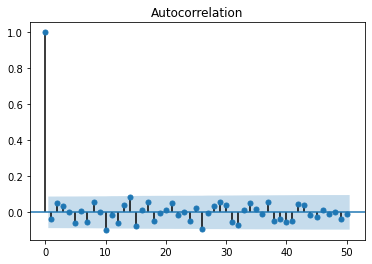

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(noise, lags=50, alpha=0.05)
plt.show()

## ***Stock Market Returns: Close to White Noise***

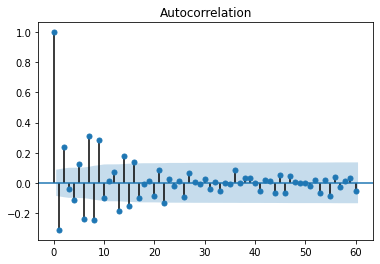

In [ ]:
from pandas_datareader.data import DataReader
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Be careful.  Data available from FRED for SP500 is only 10 years back.
stocks = DataReader('SP500', 'fred', '2020-01-20').dropna()
returns = stocks.pct_change().dropna()
plot_acf(returns['SP500'], lags=60, alpha=0.05)
plt.show()

### ***Can't Forecast White Noise***

A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

You will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. You can use **`np.random.normal()`** to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.

Plot this white noise series to see what it looks like, and then plot the autocorrelation function.

* Generate `1000` random normal returns using **`np.random.normal()`** with mean 2% (`0.02`) and standard deviation 5% (`0.05`), where the argument for the mean is **`loc`** and the argument for the standard deviation is **`scale`**.
* Verify the mean and standard deviation of returns using **`np.mean()`** and **`np.std()`**.
* Plot the time series.
* Plot the autocorrelation function using `plot_acf` with `lags=20`.

The mean is 0.020 and the standard deviation is 0.050


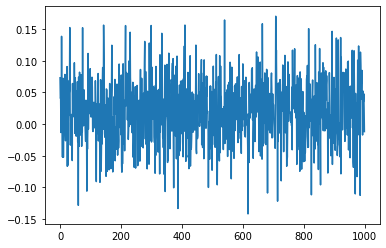

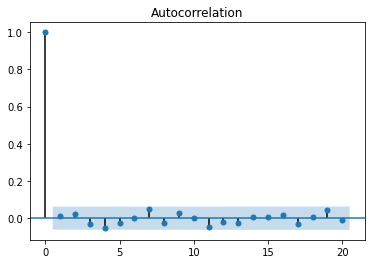

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import matplotlib.pyplot as plt 

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

Notice that for a white noise time series, *all the autocorrelations are close to zero, so <ins>the past will not help you forecast the future</ins>*.

# ***What is a Random Walk?***

* Today's Price = Yesterday's Price + Noise

$$P_{t} = P_{t-1} + \varepsilon_t $$

* Change in price is white noise

$$P_{t} - P_{t-1} = \varepsilon_t$$

* Can't forecast a random walk

## ***Random walk with drift***

$$P_t = \mu + P_{t-1} + \varepsilon_t$$

# ***Statistical Test for Random Walk***

* Regression test for random walk

$$P_t = \alpha + \beta P_{t-1} + \varepsilon_t$$

$$H_0: \beta = 1 (\text{random walk})$$
$$H_1: \beta < 1 (\text{not random walk})$$

Unfortunately, the above doesn't follow the t-distribution.

## ***(Augmented) Dickey-Fuller Test***

$$P_t - P_{t-1} = \alpha + \beta P_{t-1} + ɛ_t$$

$$H_0: \beta = 0 (\text{random walk})$$
$$H_1: \beta < 0 (\text{NOT random walk})$$

# ***ADF Test in Python***
## ***Is the S&P500 a Random Walk?***

In [ ]:
from statsmodels.tsa.stattools import adfuller
from pandas_datareader.data import DataReader

# Be careful.  Data available from FRED for SP500 is only 10 years back.
stocks = DataReader('SP500', 'fred', '2013-01-20').dropna()
returns = stocks.pct_change().dropna()
results = adfuller(stocks['SP500'])

# Print p-value
print(results[1])

#1st difference
results = adfuller(returns['SP500'])

# Print p-value
print(results[1])

0.990648201613733
2.6475818507976163e-18


S&P500 is a random walk (has unit root) but the first difference doesn't have a unit root.

### ***Generate a Random Walk***

Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

You will simulate the price of a stock over time that has a starting price of `100` and every day goes up or down by a random amount. Then, plot the simulated stock price. If you hit the "Run Code" code button multiple times, you'll see several realizations.

* Generate `500` random normal "steps" with mean=`0` and standard deviation=`1` using **`np.random.normal()`**, where the argument for the mean is **`loc`** and the argument for the standard deviation is **`scale`**.
* Simulate stock prices `P`:
  * Cumulate the random `steps` using the numpy **`.cumsum()`** method
  * Add `100` to `P` to get a starting stock price of `100`.
* Plot the simulated random walk

\begin{align*}
P_1 & = P_0 + 100 + \epsilon_1 = 100 + \epsilon_1\\
P_2 & = P_1 + \epsilon_2 = 100  + \epsilon_1 + \epsilon_2 \\
P_3 & = P_2 + \epsilon_3 = 100  + \epsilon_1 + \epsilon_2 + \epsilon_3
\end{align*}

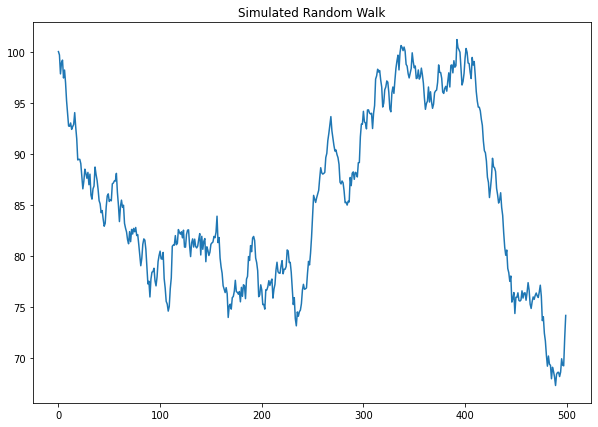

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,7))

# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

### ***Get the Drift***

In the last exercise, you simulated stock prices that follow a random walk. You will extend this in two ways in this exercise.

You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.
In the last exercise, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.

* Generate `500` random normal multiplicative "`steps`" with mean `0.1%` and standard deviation `1%` using **`np.random.normal()`**, which are now returns, and add one for total return.
* Simulate stock prices `P`:
  * Cumulate the product of the steps using the numpy **`.cumprod()`** method.
  * Multiply the cumulative product of total returns by `100` to get a starting value of `100`.
* Plot the simulated random walk with drift.

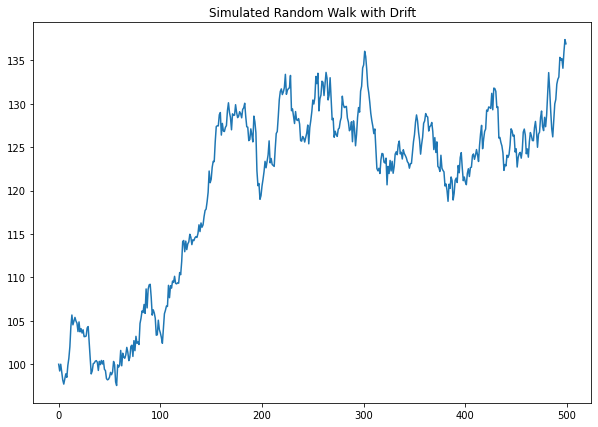

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,7))

# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

### ***Are Stock Prices a Random Walk?***

Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, pre-loaded in the DataFrame `AMZN`, and run the 'Augmented Dickey-Fuller Test' from the **`statsmodels`** library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

* Import the **`adfuller`** module from **`statsmodels`**.
* Run the Augmented Dickey-Fuller test on the series of closing stock prices, which is the column `'Adj Close'` in the `AMZN` DataFrame.
* Print out the entire output, which includes the test statistic, the p-values, and the critical values for tests with 1%, 10%, and 5% levels.
* Print out just the p-value of the test (`results[0]` is the test statistic, and `results[1]` is the p-value).

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

AMZN = pd.read_csv('AMZN.csv', index_col='Date', parse_dates=True)

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.0251685257707415, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


According to this test, we cannot reject the hypothesis that Amazon prices follow a random walk. In the next exercise, you'll look at Amazon returns.

### ***How About Stock Returns?***

In the last exercise, you showed that Amazon stock prices, contained in the DataFrame `AMZN` follow a random walk. In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

* Import the `adfuller` module from `statsmodels`.
* Create a new DataFrame of `AMZN` returns by taking the percent change of prices using the method `.pct_change()`.
* Eliminate the `NaN` in the first row of returns using the `.dropna()` method on the DataFrame.
* Run the Augmented Dickey-Fuller test on the `'Adj Close'` column of `AMZN_ret`, and print out the p-value in `results[1]`.

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

AMZN = pd.read_csv('AMZN.csv', index_col='Date', parse_dates=True)

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.565589808347145e-22


The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

# ***Weak stationarity***

* <ins>**Mean**</ins>, <ins>**variance**</ins> and <ins>**autocorrelation**</ins> are time-invariant (i.e., for autocorrelation, $\text{corr}(X_t, X_{t-\tau} )$ is only a function of $τ$.)
* If the time series is not stationary, then <ins>**Mean**</ins>, <ins>**variance**</ins> and <ins>**autocorrelation**</ins> differ across time 
  * Then, there are too many parameters to estimate
  * The number of paraameters may be even more than the number of actual data


## **Examples of Nonstationary Series**

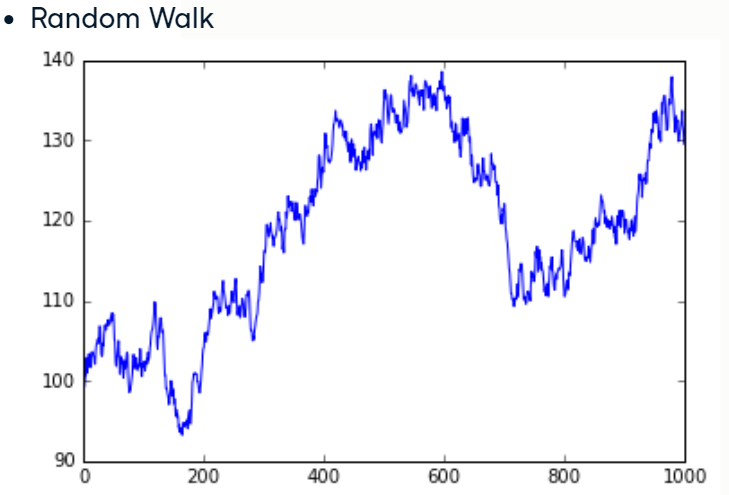

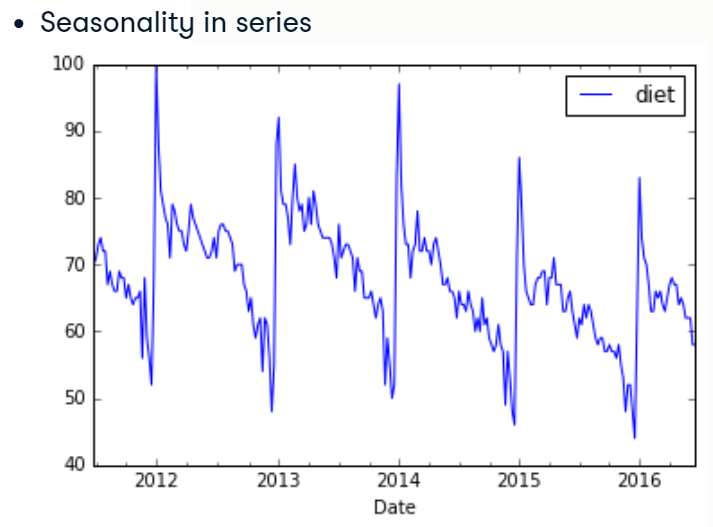

## **White noise with increasing mean over time $\Rightarrow$ Nonstationary**

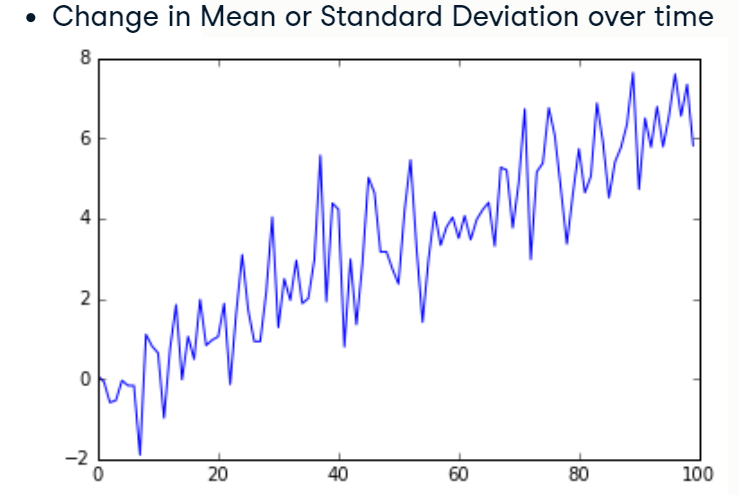

# ***Transforming Nonstationary Series Into Stationary Series***

In [ ]:
from pandas_datareader.data import get_data_yahoo
import matplotlib.pyplot as plt

SPY = get_data_yahoo('^GSPC', '2003-01-01').dropna()

## **Random Walk**

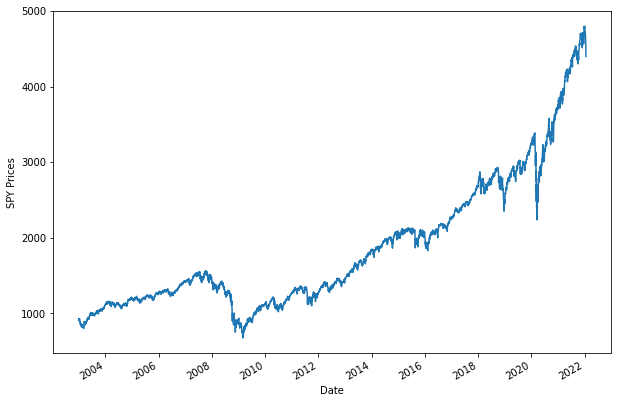

In [ ]:
SPY['Adj Close'].plot(figsize=(10, 7))
plt.ylabel('SPY Prices')
plt.show()

## **First Difference**

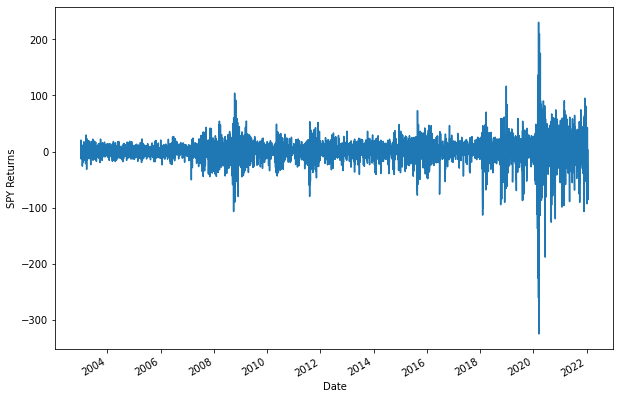

In [ ]:
SPY['Adj Close'].diff().plot(figsize=(10, 7))
plt.ylabel('SPY Returns')
plt.show()

## **Seasonality**

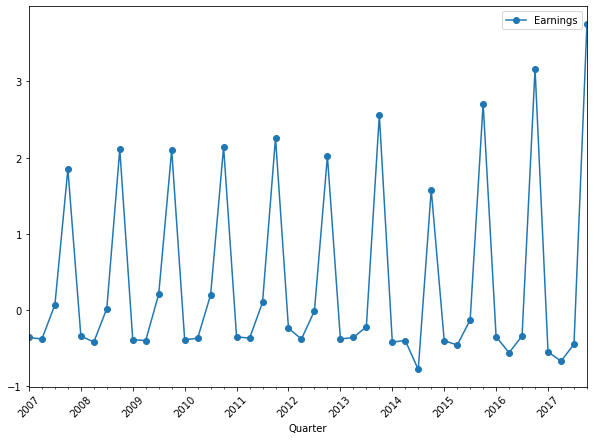

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

HRB = pd.read_csv('HRB.csv', index_col='Quarter', parse_dates=True)

HRB.plot(figsize=(10, 7), label='Earnings', marker='o', rot=45)
plt.legend()
plt.show()

## **Seasonal difference**

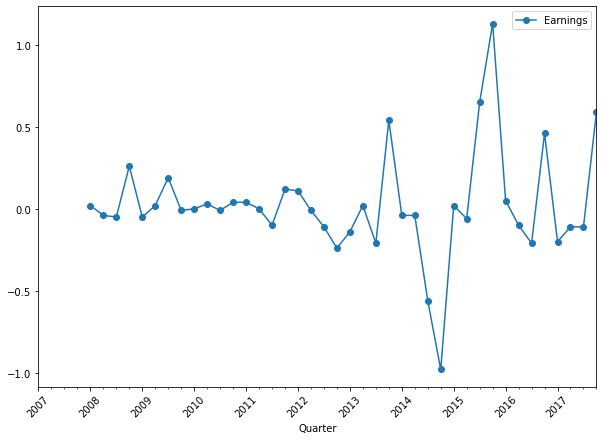

In [ ]:
HRB.diff(4).plot(figsize=(10, 7), marker='o', rot=45)
plt.show()

## **AMZN Quarterly Revenues**

* This is not AMZN stock prices.

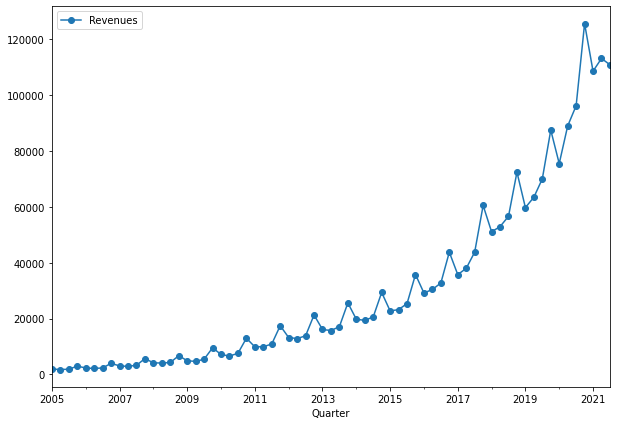

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

AMZN = pd.read_csv('AMZN_rev.csv', index_col='Quarter', parse_dates=['Quarter']).drop(columns='Unnamed: 0')
AMZN.plot(figsize=(10,7), marker='o', label='Revenues')
plt.show()

* First, get rid of the exponential growth.

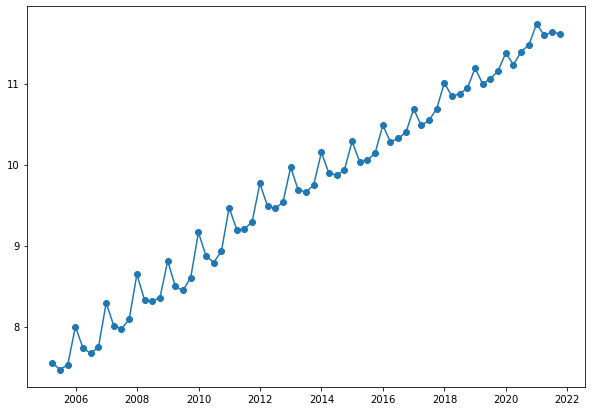

In [ ]:
import numpy as np

# Log of AMZN 

plt.figure(figsize=(10, 7))
plt.plot(np.log(AMZN), marker='o')
plt.show()

* Second, get rid of seasonality

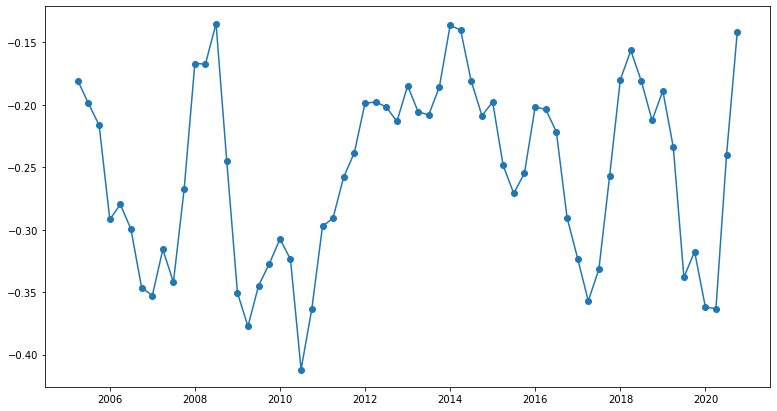

In [ ]:
plt.figure(figsize=(13, 7))
plt.plot(np.log(AMZN).diff(4), marker='o')
plt.show()

### ***Seasonal Adjustment During Tax Season***

Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called ***seasonal adjustment***. For example, most economic data published by the government is ***seasonally adjusted***.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take ***differences with a lag corresponding to the periodicity***.

Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the DataFrame HRB, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,… because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

* Create a new DataFrame of seasonally adjusted earnings by taking the lag-4 difference of quarterly earnings using the **`.diff()`** method.
* Examine the first `10` rows of the seasonally adjusted DataFrame and notice that the first four rows are `NaN`.
* Drop the `NaN` rows using the **`.dropna()`** method.
* Plot the autocorrelation function of the seasonally adjusted DataFrame.

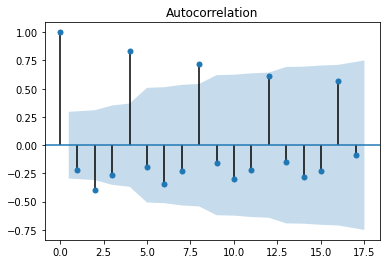

,Earnings,Earnings
Quarter,,
2007-01-01,-0.36,NaN
2007-04-01,-0.38,NaN
2007-07-01,0.07,NaN
2007-10-01,1.85,NaN
2008-01-01,-0.34,0.02
2008-04-01,-0.42,-0.04
2008-07-01,0.02,-0.05
2008-10-01,2.11,0.26
2009-01-01,-0.39,-0.05


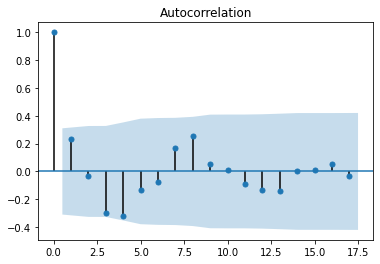

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

HRB = pd.read_csv('HRB.csv', index_col='Quarter', parse_dates=True)
plot_acf(HRB, alpha=0.05)
plt.show()

###########################################################################
###########################################################################

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
display(pd.concat([HRB,HRBsa], axis=1).head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function.

# ***AR(1)***

$$R_t = \mu + \phi R_{t-1} + \epsilon_t, \ \ -1 < \phi < 1$$

* $\phi=1 \Rightarrow$ random walk
* $\phi=0 \Rightarrow$ white noise
* $\phi < 0 \Rightarrow$ mean reversion
* $\phi > 0 \Rightarrow$ momentum

# ***Comparison of AR(1) Time Series***


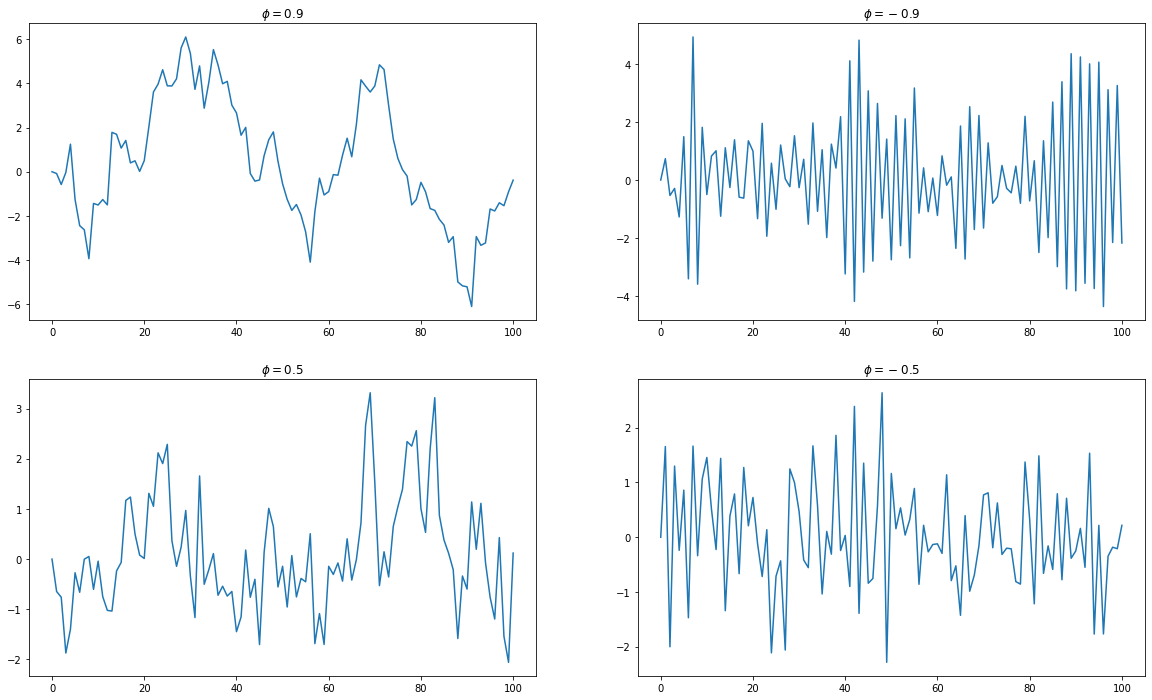

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

phis = np.array([[0.9, -0.9], [0.5, -0.5]])
T = 100

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
for i in range(2):
    for j in range(2):
        R = np.empty(T+1)
        R[0] = 0
        for t in range(T):
            R[t+1] = phis[i,j]*R[t] + np.random.normal(loc=0, scale=1, size=1)
        axes[i, j].plot(R)
        t = f'$\phi = {phis[i,j]:.2}$'
        axes[i, j].set(title=t)
plt.show()

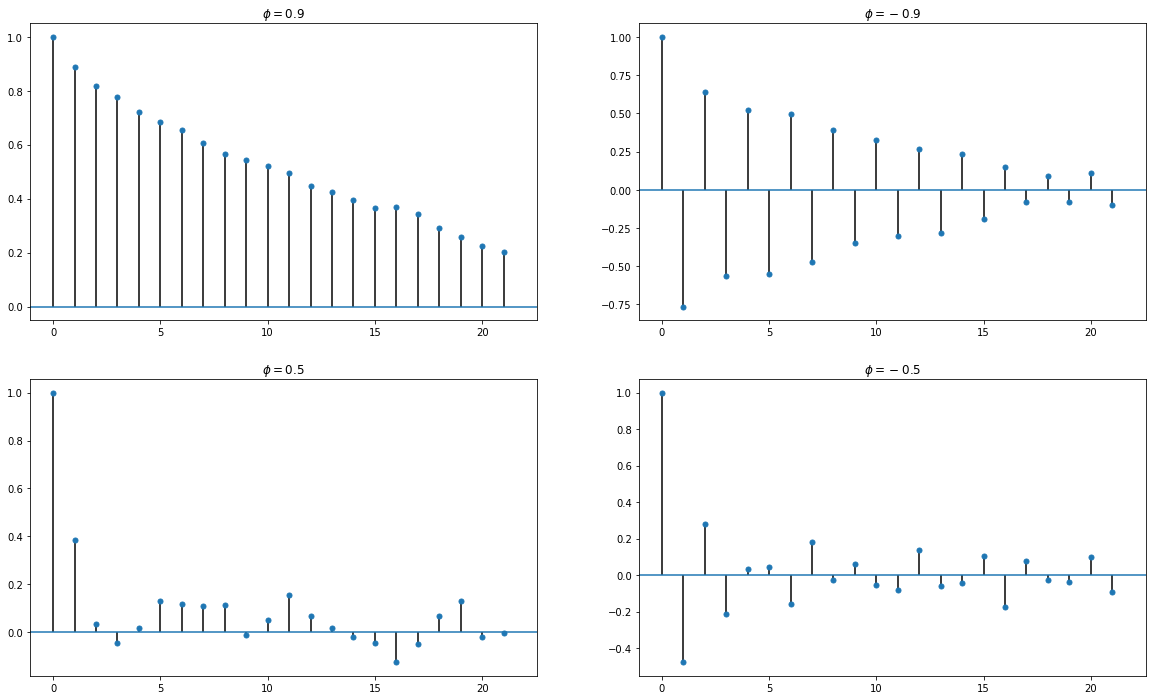

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

phis = np.array([[0.9, -0.9], [0.5, -0.5]])
T = 100

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
for i in range(2):
    for j in range(2):
        R = np.empty(T+1)
        R[0] = 0
        for t in range(T):
            R[t+1] = phis[i,j]*R[t] + np.random.normal(loc=0, scale=1, size=1)
        plot_acf(R, alpha=1, ax=axes[i,j])
        t = f'$\phi = {phis[i,j]:.2}$'
        axes[i, j].set(title=t)
plt.show()

# ***Simulating an AR Process using statsmodel***



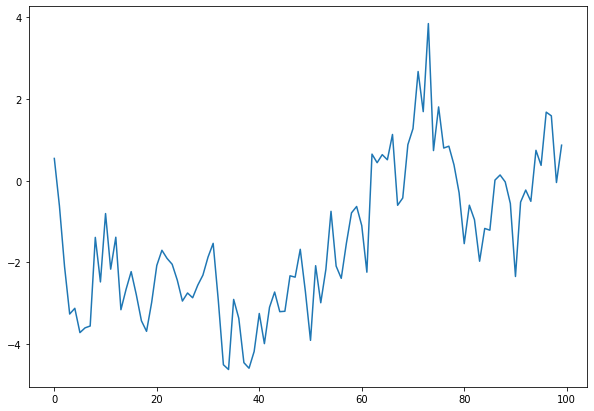

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

ar = np.array([1, -0.9]) # <<< Must include the first coefficient of 1
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=100)
plt.plot(simulated_data)
plt.show()

### ***Simulate AR(1) Time Series***

You will simulate and plot a few AR(1) time series, each with a different parameter, , using the **`arima_process`** module in **`statsmodels`**. In this exercise, you will look at an AR(1) model with a large positive  and a large negative , but feel free to play around with your own parameters.

There are a few conventions when using the **`arima_process`** module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must 

* include the zero-lag coefficient of `1`, 
* the sign of the other coefficients is <ins>*opposite*</ins> what we have been using For example, for an AR(1) process with $\phi=0.9$, the array representing the AR parameters would be `ar = np.array([1, -0.9])`

* Import the class **`ArmaProcess`** in the **`arima_process`** module.
* Plot the simulated AR processes:
  * Let `ar1` represent an array of the AR parameters [1, $-\phi$] as explained above. For now, the MA parameter array, `ma1`, will contain just the lag-zero coefficient of one.
  * With parameters `ar1` and `ma1`, create an instance of the class **`ArmaProcess(ar,ma)`** called `AR_object1`.
  *  Simulate `1000` data points from the object you just created, `AR_object1`, using the method **`.generate_sample()`**. Plot the simulated data in a subplot.
* Repeat for the other AR parameter.

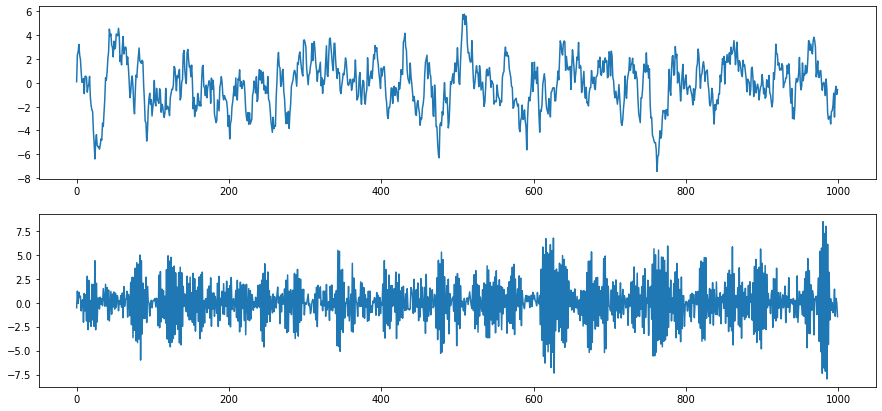

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
plt.figure(figsize=(15,7))

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

### ***Compare the ACF for Several AR Time Series***

The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, $\phi = +0.9$, the first-lag autocorrelation will be 0.9, the second-lag will be $0.9^2=0.81$
, the third-lag will be $0.9^3=0.729$
, etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say  -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be $(-0.9)^2 = 0.81$
, the third-lag will be $(-0.9)^3 = -0.729$, etc.

The object `simulated_data_1` is the simulated time series with an AR parameter of `+0.9`, `simulated_data_2` is for an AR parameter of `-0.9`, and `simulated_data_3` is for an AR parameter of `0.3`

* Plot the autocorrelation function for each of the three simulated datasets using the **`plot_acf function`** with `20` lags (and suppress the confidence intervals by setting `alpha=1`).

<Figure size 864x504 with 0 Axes>

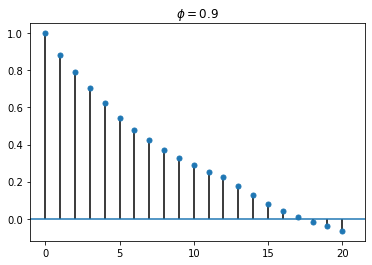

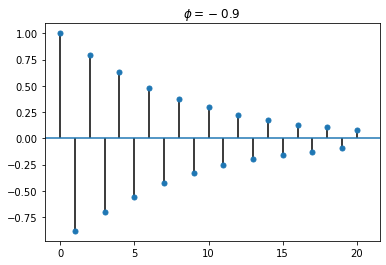

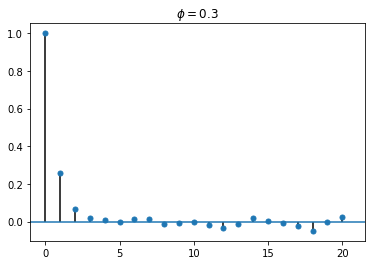

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,7))

s = np.empty((3, 1000))

for i, phi in enumerate([-0.9, 0.9, -0.3]):
    ar = np.array([1, phi])
    ma = np.array([1])
    AR_object = ArmaProcess(ar, ma)
    s[i] = AR_object.generate_sample(nsample=1000)

simulated_data_1 = s[0]
simulated_data_2 = s[1]
simulated_data_3 = s[2]

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.title(f'$\phi = 0.9$')
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.title(f'$\phi = -0.9$')
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.title(f'$\phi = 0.3$')
plt.show()

# ***Estimating an AR Model***

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
import numpy as np

ar = np.array([1, -0.9]) # <<< Must include the first coefficient of 1
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=100)

mod = ARMA(simulated_data, order=(1,0))
result = mod.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 0)   Log Likelihood                -142.606
Method:                       css-mle   S.D. of innovations              1.000
Date:                Sun, 23 Jan 2022   AIC                            291.212
Time:                        05:46:47   BIC                            299.028
Sample:                             0   HQIC                           294.375
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6515      0.770      2.145      0.034       0.143       3.160
ar.L1.y        0.8786      0.047     18.579      0.000       0.786       0.971
                                    Roots           

## ***See AR(1) Coefficients***


In [ ]:
result.params

array([1.65150028, 0.87859942])

# ***Forecasting an AR Model***

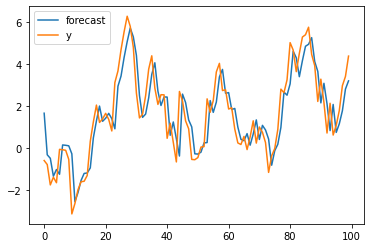

In [ ]:
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt

mod = ARMA(simulated_data, order=(1,0))
res = mod.fit()
res.plot_predict()
plt.show()

### ***Estimating an AR Model***

You will estimate the AR(1) parameter, $\phi$, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For `simulated_data_1` with a true $\phi$ of `0.9`, you will print out the estimate of $\phi$. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in `statsmodels`.

* Import the class **`ARMA`** in the module **`statsmodels.tsa.arima_model`**.
* Create an instance of the **`ARMA`** class called `mod` using the simulated data `simulated_data_1` and the order `(p,q)` of the model (in this case, for an AR(1)), is `order=(1,0)`.
* Fit the model `mod` using the method **`.fit()`** and save it in a results object called `res`.
* Print out the entire summary of results using the **`.summary()`** method.
* Just print out an estimate of the constant and $\phi$ using the **`.params`** attribute.

In [ ]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

ar = np.array([1, -0.9]) # <<< Must include the first coefficient of 1
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=1000000)

###############################################################################

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:              1000000
Model:                     ARMA(1, 0)   Log Likelihood            -1419454.170
Method:                       css-mle   S.D. of innovations              1.001
Date:                Sun, 23 Jan 2022   AIC                        2838914.339
Time:                        05:58:16   BIC                        2838949.786
Sample:                             0   HQIC                       2838924.094
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0116      0.010      1.155      0.248      -0.008       0.031
ar.L1.y        0.9002      0.000   2066.984      0.000       0.899       0.901
                                    Roots           

### ***Forecasting with an AR Model***

In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using **`statsmodels`**. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the **`.predict()`** method if you want the forecasts in the form of a series of data, or using the **`plot_predict()`** method if you want a plot of the forecasted data. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

For the simulated series `simulated_data_1` with , you will plot in-sample and out-of-sample forecasts.

* Import the class **`ARMA`** in the module **`statsmodels.tsa.arima_model`**
* Create an instance of the **`ARMA`** class called `mod` using the simulated data `simulated_data_1` and the order (p,q) of the model (in this case, for an AR(1) `order=(1,0)`
* Fit the model `mod` using the method **`.fit()`** and save it in a results object called `res`
* Plot the in-sample and out-of-sample forecasts of the data using the **`plot_predict()`** method
* Start the forecast `10` data points before the end of the `1000` point series at `990`, and end the forecast `10` data points after the end of the series at point `1010`

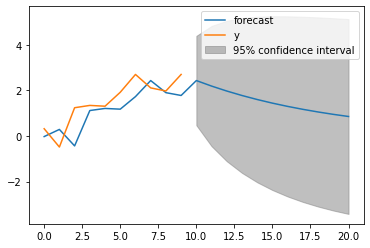

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=1000000-10, end=1000000+10)
plt.show()

Notice how, when $\phi$ is high like here, the forecast gradually moves to the long term mean of zero, but if $\phi$ were low, it would move much quicker to the long term mean. Try it out and see for yourself!

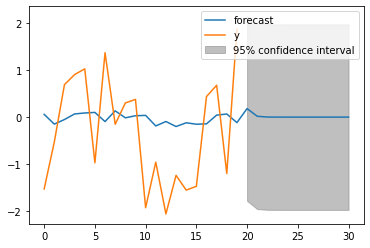

In [ ]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np

ar = np.array([1, -0.1]) # <<< Must include the first coefficient of 1
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=1000000)

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=1000000-20, end=1000000+10)
plt.show()

### ***Let's Forecast Interest Rates***

You will now use the forecasting techniques you learned in the last exercise and apply it to real data rather than simulated data. You will revisit a dataset from the first chapter: the annual data of 10-year interest rates going back 56 years, which is in a Series called `interest_rate_data`. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.


* Import the class `ARMA` in the module `statsmodels.tsa.arima_model`.
* Create an instance of the `ARMA` class called `mod` using the annual interest rate data and choosing the order for an `AR(1)` model.
* Fit the model `mod` using the method `.fit()` and save it in a results object called `res`.
* Plot the in-sample and out-of-sample forecasts of the data using the `.plot_predict()` method.
  * Pass the arguments `start=0` to start the in-sample forecast from the beginning, and choose end to be `'2022'` to forecast several years in the future.
  * Note that the end argument `2022` must be in quotes here since it represents a date and not an integer position.

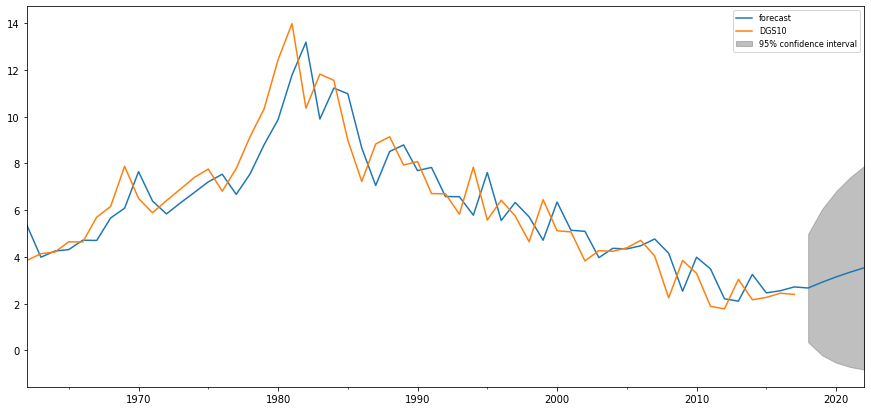

In [ ]:
from pandas_datareader.data import DataReader
import numpy as np
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt

bonds  = DataReader('DGS10', 'fred', '1960-12-31').dropna()
bonds = bonds.resample('Y').last()
interest_rate_data = bonds.loc[:'2017-12-31']

##############################################################################
##############################################################################

# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()
fig, ax = plt.subplots(figsize=(15,7))
# Plot the original series and the forecasted series
res.plot_predict(start=0, end='2022', ax=ax)
plt.legend(fontsize=8)
plt.show()

According to an AR(1) model, 10-year interest rates are forecasted to rise from 2.16%, towards the end of 2017 to 3.35% in five years.

Data from exercises end at 2017-12-31.  What about the real data until 2022?

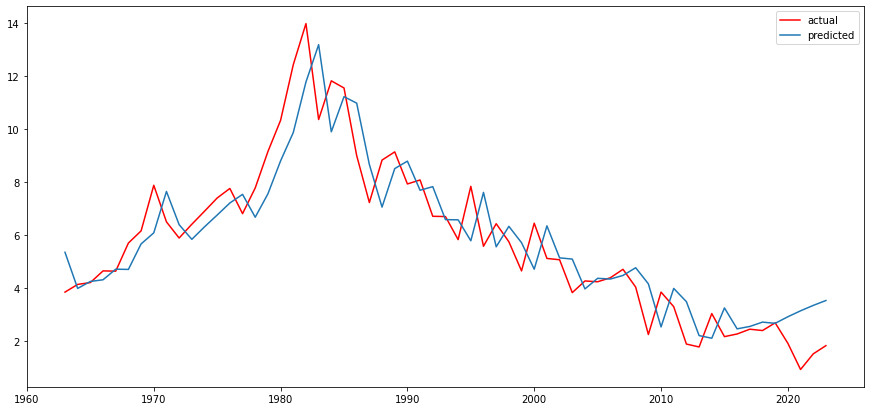

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(bonds, color='red', label='actual')
plt.plot(res.predict(start=0, end='2022'), label='predicted') #<<< See how to get syntax from below cell 
plt.legend()
plt.show()

The estimation cannot account for Covid-19 crisis.  

สำหรับการไปหาว่า ข้อมูลใน `plot_predict` เอามาได้ไง ให้เป็นค่า predict ดูด้านล่าง

มาจาก

```
forecast = self.predict(start, end, exog, dynamic)
```

In [ ]:
from inspect import getsource
print(getsource(res.plot_predict))

    def plot_predict(self, start=None, end=None, exog=None, dynamic=False,
                     alpha=.05, plot_insample=True, ax=None):
        from statsmodels.graphics.utils import _import_mpl, create_mpl_ax
        _ = _import_mpl()
        fig, ax = create_mpl_ax(ax)

        # use predict so you set dates
        forecast = self.predict(start, end, exog, dynamic)
        # doing this twice. just add a plot keyword to predict?
        start, end, out_of_sample, _ = (
            self.model._get_prediction_index(start, end, dynamic=False))

        if out_of_sample:
            steps = out_of_sample
            fc_error = self._forecast_error(steps)
            conf_int = self._forecast_conf_int(forecast[-steps:], fc_error,
                                               alpha)

        if hasattr(self.data, "predict_dates"):
            from pandas import Series
            forecast = Series(forecast, index=self.data.predict_dates)
            ax = forecast.plot(ax=ax, label='forec

### ***Compare AR Model with Random Walk***

Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

* Import `plot_acf` function from the `statsmodels` module
* Create two axes for the two subplots
* Plot the autocorrelation function for 12 lags of the interest rate series `interest_rate_data` in the top plot
* Plot the autocorrelation function for 12 lags of the interest rate series `simulated_data` in the bottom plot

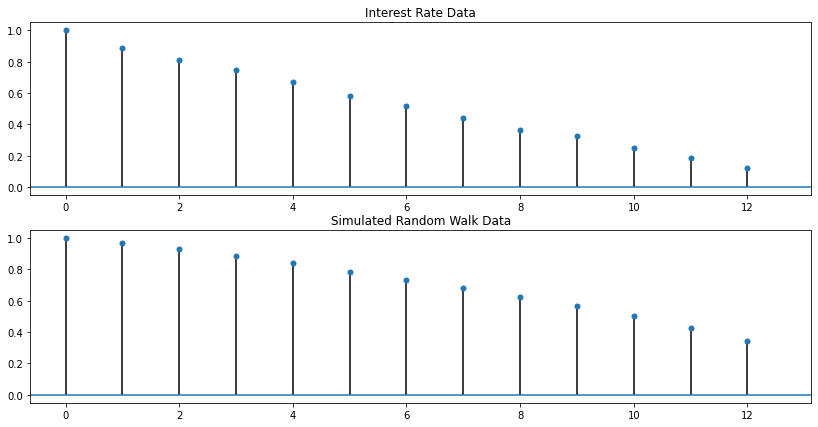

In [ ]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt

bonds  = DataReader('DGS10', 'fred', '1960-12-31').dropna()
bonds = bonds.resample('Y').last()
interest_rate_data = bonds.loc[:'2017-12-31']

# Generate 56 random steps
steps = np.random.normal(loc=0, scale=0.05, size=56) + 1

# Set first element to 1
steps[0]=5

# Simulate the stock price, P, by taking the cumulative product
simulated_data =  np.cumprod(steps)

###############################################################################
###############################################################################

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1, figsize=(14,7))

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

Notice the Autocorrelation functions look very similar for the two series.

In [ ]:
from statsmodels.tsa.arima_model import ARMA

print(ARMA(simulated_data, order=(1,0)).fit().summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   56
Model:                     ARMA(1, 0)   Log Likelihood                   8.296
Method:                       css-mle   S.D. of innovations              0.203
Date:                Sun, 23 Jan 2022   AIC                            -10.592
Time:                        07:51:02   BIC                             -4.516
Sample:                             0   HQIC                            -8.236
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3315      0.654      6.621      0.000       3.049       5.614
ar.L1.y        0.9723      0.023     41.985      0.000       0.927       1.018
                                    Roots           

ถึงแม้ ACF จะคล้ายกันจนแยกไ่่ม่ออก เราสามารถตรวจสอบได้ว่าเป็น AR(1) หรือ Random Walk จาก DF-Test โดยปกติ ค่า $\phi$ ที่มากกว่า 0.95 มีแนวโน้มสูงที่จะเป็น Random Walk

# ***Identifying the Order of an AR Model using PACF***


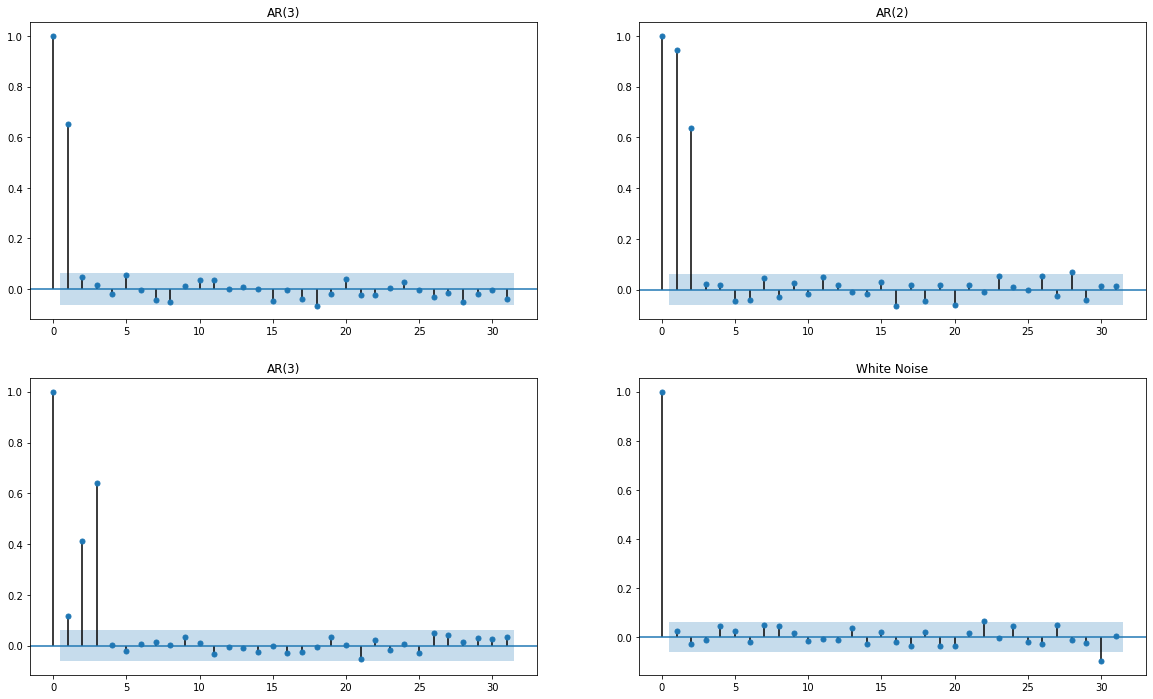

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np

phis = np.array([[0.65, 0.35], [-0.2, 0]]) # << There is some theory (I forgot behind these values)
T = 1000

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
for i in range(2):
    for j in range(2):
        R = np.empty(T+3)
        R[0] = 0
        for t in range(T):
            if (i == 0) & (j == 0):
                R[t+1] = phis[i,j]*R[t] + np.random.normal(loc=0, scale=1, size=1)
            if (i == 0) & (j == 1):
                R[1] = 0  
                R[t+2] = phis[i,j]*R[t+1] + phis[i,j-1]*R[t] + np.random.normal(loc=0, scale=1, size=1)
            if (i == 1) & (j == 0):
                R[2], R[1] = 0, 0
                R[t+3] = phis[i,j]*R[t+2] + phis[i-1,j+1]*R[t+1] + phis[i-1, j]*R[t] + np.random.normal(loc=0, scale=1, size=1)
            if (i == 1) & (j == 1):
                R[t] = np.random.normal(loc=0, scale=1, size=1)
        plot_pacf(R, alpha=0.05, ax=axes[i,j])
        
        if (i == 1) & (j == 1):
            axes[i, j].set(title='White Noise')
        elif (i != 1) & (j != 0):
            axes[i, j].set(title=f"AR({1+i+j})")
        else:
            axes[i, j].set(title=f"AR(3)")
plt.show()

# ***Information Criterion***
* $AIC$
* $BIC$

In [ ]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

ar = np.array([1, 0.615, 0.315]) # <<< Must include the first coefficient of 1
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=10000)

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data, order=(2,0))
res = mod.fit()
print(res.summary())
print(res.aic, res.bic)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                10000
Model:                     ARMA(2, 0)   Log Likelihood              -14061.075
Method:                       css-mle   S.D. of innovations              0.987
Date:                Sun, 23 Jan 2022   AIC                          28130.149
Time:                        13:32:34   BIC                          28158.991
Sample:                             0   HQIC                         28139.912
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.005     -0.673      0.501      -0.013       0.007
ar.L1.y       -0.6058      0.009    -63.964      0.000      -0.624      -0.587
ar.L2.y       -0.3213      0.009    -33.919      0.0

### ***Estimate Order of Model: PACF***

One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that 

* for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. 
* for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

Just like you used the `plot_acf` function in earlier exercises, here you will use a function called `plot_pacf` in the `statsmodels` module.

* Import the modules for simulating data and for plotting the PACF
* Simulate an AR(1) with  (remember that the sign for the AR parameter is reversed)
* Plot the PACF for `simulated_data_1` using the `plot_pacf` function
* Simulate an AR(2) with 
 (again, reverse the signs)
* Plot the PACF for `simulated_data_2` using the `plot_pacf` function



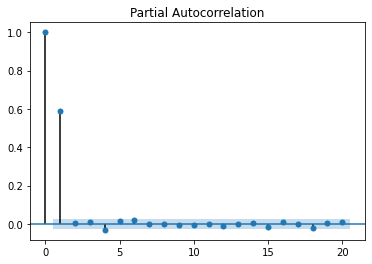

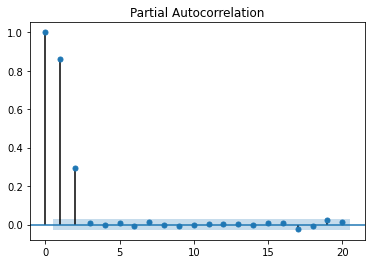

In [ ]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np
import matplotlib.pyplot as plt


# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

Notice that ***the number of significant lags for the PACF indicate the order of the AR model***

### ***Estimate Order of Model: Information Criteria***

Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last exercise, saved as `simulated_data_2`, and compute the BIC as you vary the order, `p`, in an AR(p) from 0 to 6.

* Initialize a numpy array `BIC`, which we will use to store the BIC for each AR(p) model.
* Loop through order `p` for p = 0,…,6.
  * For each `p`, fit the data to an AR model of order p.
  * For each `p`, save the value of `BIC` using the `.bic` attribute (no parentheses) of `res`.
* Plot `BIC` as a function of `p` (for the plot, skip `p=0` and plot for p=1,…6).

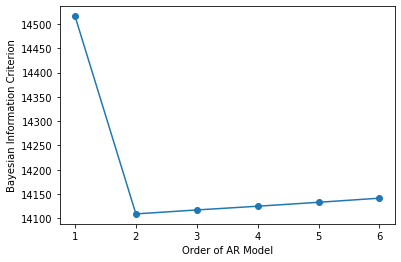

In [ ]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)
##############################################################################

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.

# ***The MA(1)  Model***

$$R_t = \mu + \epsilon_t + \theta \epsilon_{t-1}$$

* $\theta < 0$: One-Period Mean Reversion
* $\theta > 0$: One-Period Momentum

## ***One-period autocorrelation: $\rho_1$***

\begin{align*}
var(R_t, R_{t-1}) & = E(R_t-E(R_t))(R_{t-1}-E(R_{t-1}))\\
& = E(\mu + \epsilon_t + \theta \epsilon_{t-1} - \mu )(\mu + \epsilon_{t-1} + \theta \epsilon_{t-2}-\mu)\\
& = E(\epsilon_t + \theta \epsilon_{t-1})(\epsilon_{t-1} + \theta \epsilon_{t-2})\\
& = E[ϵ_t\epsilon_{t-1} + \theta \epsilon_{t-1}^2 + \epsilon_t\epsilon_{t-2} + \theta^2\epsilon_t\epsilon_{t-2}]\\
& = E[ϵ_t\epsilon_{t-1} ]+ E[\theta \epsilon_{t-1}^2] + E[\epsilon_t\epsilon_{t-2}] + E[\theta^2\epsilon_t\epsilon_{t-2}]\\
& = \theta\sigma^2\\
var(R_t) & = E(R_t-E(R_t))(R_t-E(R_t))\\
& = E(\epsilon_t^2 + 2\theta \epsilon_t\epsilon_{t-1} + \theta^2\epsilon_{t-1}^2)\\
& = (1 + \theta^2)\sigma^2\\
\rho_1 & = \frac{var(R_t)}{var(R_t, R_{t-1})} = \frac{\theta}{1+\theta^2}
\end{align*}

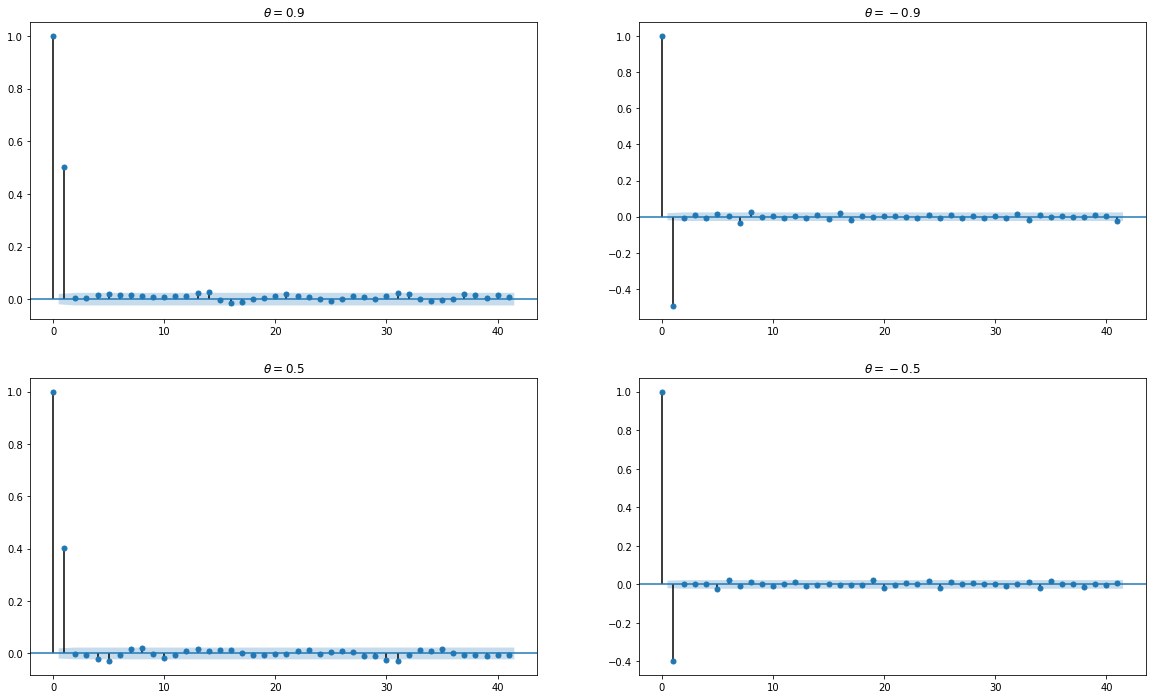

In [13]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

theta = np.array([[0.9, -0.9], [0.5, -0.5]])
T = 10000

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
for i in range(2):
    for j in range(2):
        R, E = np.empty(T+1), np.empty(T+1)
        R[0], E[0] = 0, np.random.normal(loc=0, scale=1, size=1)
        for t in range(T):
            E[t+1] = np.random.normal(loc=0, scale=1, size=1)
            R[t+1] = E[t+1] + theta[i,j]*E[t]
        plot_acf(R, alpha=0.05, ax=axes[i,j])
        t = rf'$\theta = {theta[i,j]:.2}$'
        axes[i, j].set(title=t)
plt.show()

# ***Higher-Order MA***
* MA(2)
$$R_t = \mu + \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2}$$
* MA(3)
$$R_t = \mu + \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \theta_3\epsilon_{t-3}$$

# ***Simulate an MA process using*** **`statsmodel`**

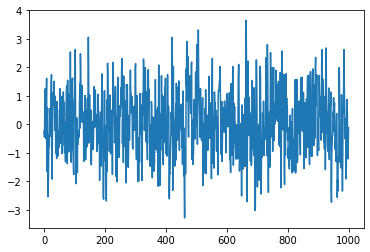

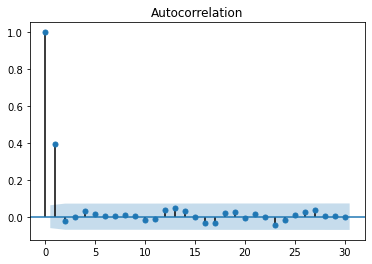

In [15]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

ar = np.array([1])
ma = np.array([1, 0.5])  # <<<<< ไม่เหมือน AR ตรงที่ 0.5 ก็คือ 0.5 ไม่ใช่ -0.5
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)
plot_acf(simulated_data, alpha=0.05)
plt.show()

### ***Simulate MA(1) Time Series***

You will simulate and plot a few MA(1) time series, each with a different parameter, $\theta$, using the **`ArmaProcess`** in **`statsmodels`**, just as you did in the last chapter for AR(1) models. You will look at an MA(1) model with a large positive  and a large negative $\theta$.

As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of `1`, but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with $\theta$ = -0.9 , the array representing the MA parameters would be `ma = np.array([1, -0.9])`

* Import the class **`ArmaProcess`** in the **`arima_process`** module.
* Plot the simulated MA(1) processes
* Let `ma1` represent an array of the MA parameters [1,  $\theta$] as explained above. The AR parameter array will contain just the lag-zero coefficient of one.
With parameters `ar1` and `ma1`, create an instance of the class **`ArmaProcess(ar,ma)`** called `MA_object1`.
* Simulate 1,000 data points from the object you just created, `MA_object1`, using the method **`.generate_sample()`**. Plot the simulated data in a subplot.
* Repeat for the other MA parameter.

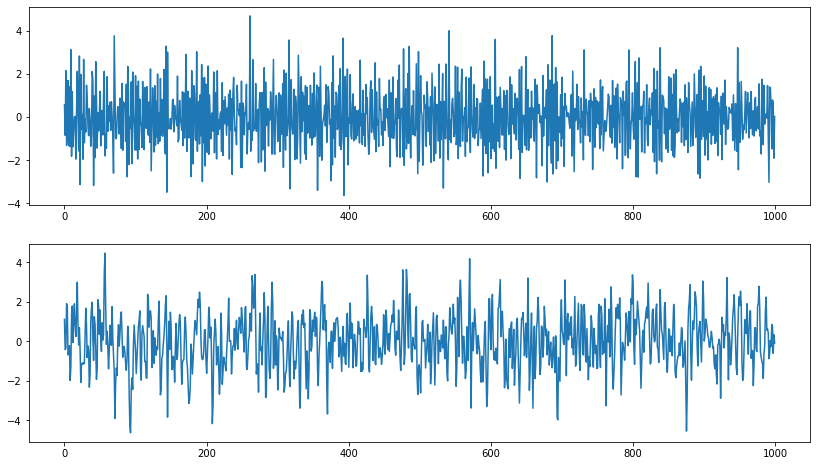

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.figure(figsize=(14, 8))
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

### ***Compute the ACF for Several MA Time Series***

Unlike an AR(1), <ins>an MA(1) model has no autocorrelation beyond lag 1</ins>, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not $\theta$, but rather $\dfrac{\theta}{1+\theta^2}$ (Derivation is above.). For example, if the MA parameter, $\theta$, is = +0.9, the first-lag autocorrelation will be $\dfrac{0.9}{1+(0.9)^2}$ = 0.497 
, and the autocorrelation at all other lags will be zero. If the MA parameter, , is -0.9, the first-lag autocorrelation will be $-\dfrac{0.9}{1+(0.9)^2}$ = -0.497
.

You will verify these autocorrelation functions for the three time series you generated in the last exercise.

* `simulated_data_1` is the first simulated time series with an MA parameter of $\theta = -0.9$.
* Compute the autocorrelation function of `simulated_data_1` using the **`plot_acf`** function with 20 lags.

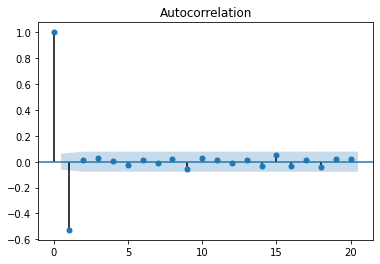

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

simulated_data_1 = ArmaProcess(np.array([1]), np.array([1, -0.9])).generate_sample(nsample=1000)

###############################################################################

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

* `simulated_data_2` is the second simulated time series with an MA parameter of $\theta=0.9$.
* Compute the autocorrelation function using the **`plot_acf`** function with `lags=20`.

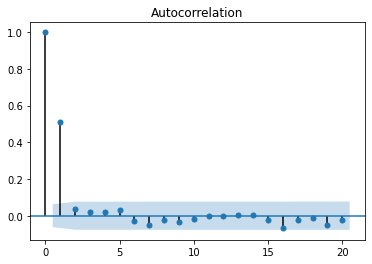

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

simulated_data_2 = ArmaProcess(np.array([1]), np.array([1, 0.9])).generate_sample(nsample=1000)
################################################################################

# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

* `simulated_data_3` is the third simulated time series with an MA parameter of $\theta=-0.3$.
* Compute the autocorrelation function using the **`plot_acf()`** function with 20 lags.

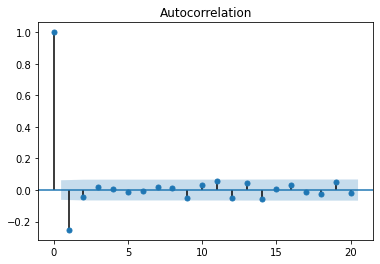

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

simulated_data_3 = ArmaProcess(np.array([1]), np.array([1, -0.3])).generate_sample(nsample=1000)
################################################################################

plot_acf(simulated_data_3, lags=20)
plt.show()

# ***Estimating an MA Model***



In [9]:
from statsmodels.tsa.arima_model import ARMA

mod = ARMA(simulated_data, order=(0,1))
result = mod.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1405.357
Method:                       css-mle   S.D. of innovations              0.986
Date:                Mon, 31 Jan 2022   AIC                           2816.714
Time:                        17:33:52   BIC                           2831.438
Sample:                             0   HQIC                          2822.310
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0279      0.059      0.471      0.638      -0.088       0.144
ma.L1.y        0.8985      0.013     66.844      0.000       0.872       0.925
                                    Roots           

# ***Forecasting an MA Model***

In [ ]:
from statsmodels.tsa.arima_model import ARMA

mod = ARMA(simulated_data, order=(0,1))
res = mod.fit()
res.plot_predict(start='2016-07-01', end='2017-06-01')
plt.show()

### ***Estimating an MA Model***

You will estimate the MA(1) parameter, $\theta$, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For `simulated_data_1` with a true $\theta$ of `-0.9`, you will print out the estimate of $\theta$. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in **`statsmodels`**.

* Import the class **`ARMA`** in the module **`statsmodels.tsa.arima_model`**.
* Create an instance of the **`ARMA`** class called `mod` using the simulated data `simulated_data_1` and the order (p,q) of the model (in this case, for an MA(1)), is `order=(0,1)`.
* Fit the model `mod` using the method **`.fit()`** and save it in a results object called `res`.
* Print out the entire summary of results using the **`.summary()`** method.
* Just print out an estimate of the constant and theta parameter using the **`.params`** attribute.

In [1]:
from statsmodels.tsa.arima_model import ARMA
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess

simulated_data_1 = ArmaProcess(np.array([1]), np.array([1, -0.9])).generate_sample(nsample=1000)

###############################################################################

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0, 1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1466.761
Method:                       css-mle   S.D. of innovations              1.048
Date:                Mon, 31 Jan 2022   AIC                           2939.523
Time:                        20:11:19   BIC                           2954.246
Sample:                             0   HQIC                          2945.119
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.003     -0.253      0.800      -0.008       0.006
ma.L1.y       -0.8961      0.013    -68.152      0.000      -0.922      -0.870
                                    Roots           

### ***Forecasting with MA Model***

As you did with AR models, you will use MA models to forecast in-sample and out-of-sample data using **`statsmodels`**.

For the simulated series `simulated_data_1` with $\theta = -0.9$, you will plot in-sample and out-of-sample forecasts. One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that <ins>the MA(1) forecasts more than one period in the future are simply the mean of the sample</ins>.

* Import the class **`ARMA`** in the module **`statsmodels.tsa.arima_model`**
* Create an instance of the **`ARMA`** class called `mod` using the simulated data `simulated_data_1` and the (p,q) order of the model (in this case, for an MA(1), `order=(0,1)`.
* Fit the model `mod` using the method **`.fit()`** and save it in a results object called `res`
* Plot the in-sample and out-of-sample forecasts of the data using the **`.plot_predict()`** method
* Start the forecast 10 data points before the end of the 1000 point series at `990`, and end the forecast 10 data points after the end of the series at point `1010`

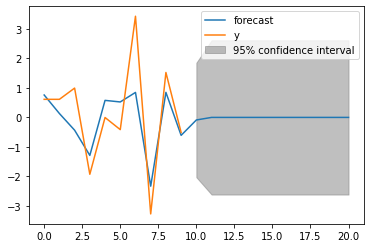

In [2]:
from statsmodels.tsa.arima_model import ARMA
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt

simulated_data_1 = ArmaProcess(np.array([1]), np.array([1, -0.9])).generate_sample(nsample=1000)

###############################################################################

# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

Notice that the out-of-sample forecasts are flat into the future after the first data point.

# ***ARMA(1,1) Model***

$$R_t = \mu + \phi R_{t-1} + \theta \epsilon_{t-1}$$

# ***Converting Between ARMA, AR, and MA Models***

## ***Converting AR(1) into an MA into an MA infinity***

\begin{align*}
R_t & = \mu + \phi R_{t-1} + \epsilon_t\\
& = \mu + \phi(\mu + \phi R_{t-2} + \epsilon_{t-1}) + \epsilon_t\\
& = \mu + \phi^2 R_{t-2} + \phi\mu + \phi\epsilon_{t-1} + ϵ_t\\
\vdots & \ \ \ \ \ \quad\quad\quad\vdots\\
R_t & = \frac{\mu}{1-\phi} + \epsilon_t +\phi\epsilon_{t-1} + \phi^2\epsilon_{t-2} + \phi^2\epsilon_{t-3} + \ldots
\end{align*}

### ***High Frequency Stock Prices***

Higher frequency stock data is well modeled by an MA(1) process, so it's a nice application of the models in this chapter.

The DataFrame `intraday` contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a little, which you will do in this and the next two exercises. When you look at the first few rows (see the IPython Shell), you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of `intraday` data.

If you look at the data types, you'll notice that the `DATE` column is an object, which here means a string. You will need to change that to numeric before you can clean up some missing data.

The source of the minute data is Google Finance (see [here](https://www.quantshare.com/sa-426-6-ways-to-download-free-intraday-and-tick-data-for-the-us-stock-market) on how the data was downloaded).

The `datetime` module has already been imported for you.

* Manually change the first date to zero using `.iloc[0,0]`.
* Change the two column headers to `'DATE'` and `'CLOSE'` by setting `intraday.columns` equal to a list containing those two strings.
* Use the pandas attribute **`.dtypes`** to see what type of data are in each column.
* Convert the `'DATE'` column to numeric using the pandas function **`to_numeric()`**.
* Make the `'DATE'` column the new index of `intraday` by using the pandas method **`.set_index()`**, which will take the string `'DATE'` as its argument (not the entire column, just the name of the column).

In [19]:
import pandas as pd
import datetime

intraday = pd.read_csv('Sprint_Intraday.txt', header=None)
intraday = intraday[[0, 1]]

##################################################################


# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

intraday.head()

DATE      object
CLOSE    float64
dtype: object


,CLOSE
DATE,
0,8.2900
1,8.2700
2,8.2800
3,8.2750
4,8.2875


### ***More Data Cleaning: Missing Data***

When you print out the length of the DataFrame `intraday`, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. After filling in the missing rows, you can convert the index to time of day and then plot the data.

Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".

* Print out the length of `intraday` using `len()`.
* Find the missing rows by making `range(391)` into a set and then subtracting the set of the intraday index, `intraday.index`.
* Fill in the missing rows using the **`.reindex()`** method, setting the index equal to the full `range(391)` and forward filling the missing data by setting the method argument to **`'ffill'`**.
* Change the index to times using pandas function **`date_range()`**, starting with `'2017-09-01 9:30'` and ending with `'2017-09-01 16:00'` and passing the argument `freq='1min'`.
* Plot the data and include gridlines.

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389
Missing rows:  {182, 14}


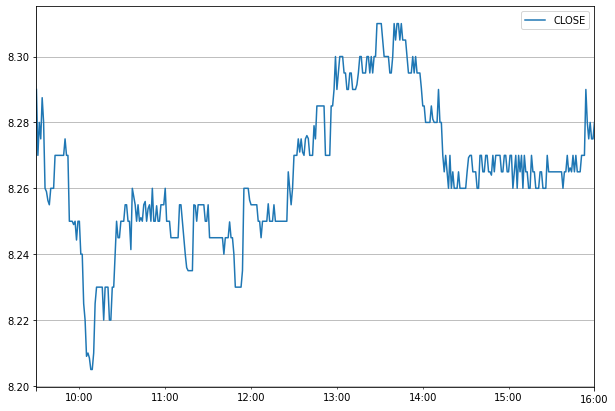

In [20]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True, figsize=(10, 7))
plt.show()

### ***Applying an MA Model*** 

The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the `intraday` stock data from the above exercise.

The first step is to compute minute-by-minute returns from the prices in `intraday`, and plot the autocorrelation function. You should observe that the ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the same way you did for simulated data.

* Import `plot_acf` and `ARMA` modules from `statsmodels`
* Compute minute-to-minute returns from prices:
  * Compute returns with the `.pct_change()` method
  * Use the pandas method `.dropna()` to drop the first row of returns, which is NaN
* Plot the ACF function with lags up to 60 minutes
* Fit the returns data to an MA(1) model and print out the MA(1) parameter

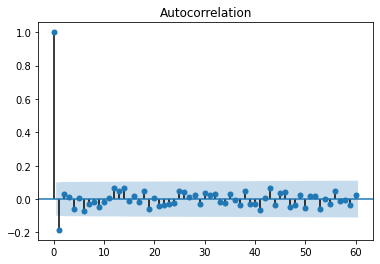

const         -0.000002
ma.L1.CLOSE   -0.179272
dtype: float64


In [21]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

Notice the significant negative lag-1 autocorrelation, just like for an MA(1) model.

### ***Equivalence of AR(1) and MA(infinity)***

To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA($\infty$) model with the appropriate parameters.

You will simulate an MA model with parameters $0.8, 0.8^2, 0.8^3, \ldots$
 for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with $\phi=0.8$.

* Use a list comprehension to build a list with exponentially decaying MA parameters: $1, 0.8, 0.8^2, 0.8^3, \ldots$
* Simulate 5,000 observations of the MA(30) model
* Plot the ACF of the simulated series

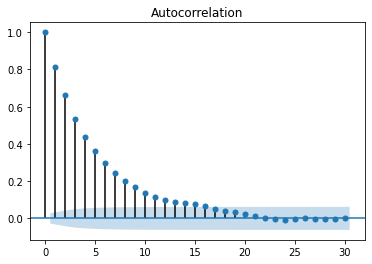

In [23]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

Notice that the ACF looks the same as an AR(1) with parameter 0.8.

# ***What is Cointegration?***

* Two series, $P_t$ and $Q_t$ can be random walks
* But the linear combination $P_t − cQ_t$ may not be a random walk!
* If that's true
  * $P_t-cQ_t$ can be forecasted
  * $P_t$ and $Q_t$ are conintegrated

* Heating oil and natural gas separately look like random walks

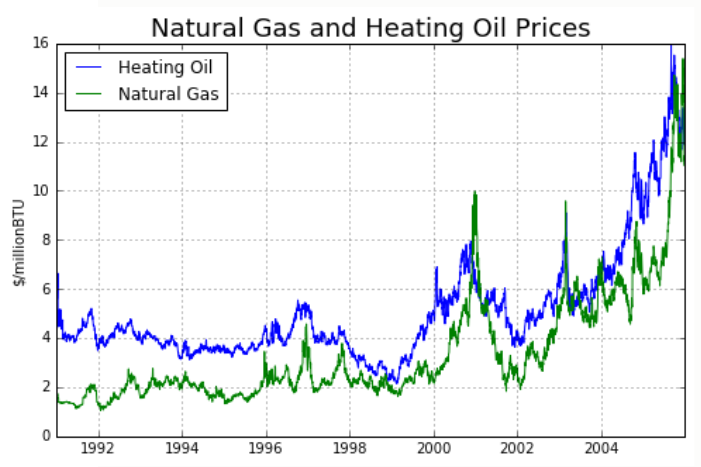

* The difference of these two series looks like mean-reversion.

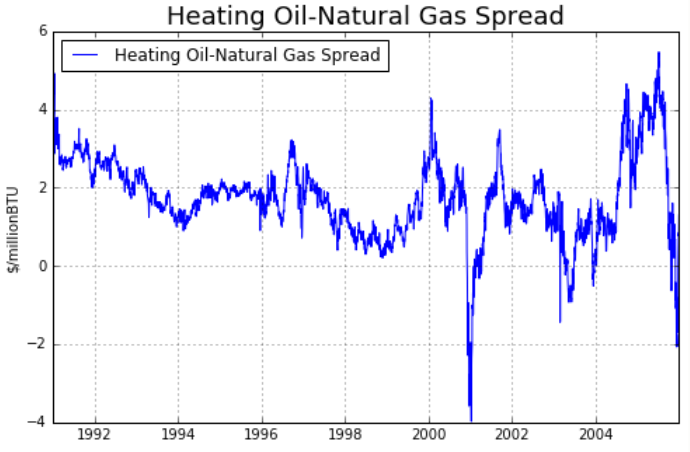

# ***Two Steps to Test for Cointegration***

* Regress $P_t$ on $Q_t$ and get slope $c$
*  Run Augmented Dickey-Fuller test on $P_t − cQ_t$ to test for
random walk
* Alternatively, one can use **`coint`** function in **`statsmodels`** that
combines both steps


In [ ]:
from statsmodels.tsa.stattools import coint
coint(P,Q)  

### ***A Dog on a Leash? (Part 1)***

The Heating Oil and Natural Gas prices are pre-loaded in DataFrames `HO` and `NG`. First, plot both price series, which look like random walks. Then plot the difference between the two series, which should look more like a mean reverting series (to put the two series in the same units, we multiply the heating oil prices, in \$/gallon, by `7.25`, which converts it to \$/millionBTU, which is the same units as Natural Gas).

The data for continuous futures (each contract has to be spliced together in a continuous series as contracts expire) was obtained from [Quandl](https://blog.quandl.com/api-for-futures-data).

* Plot Heating Oil, `HO`, and Natural Gas, `NG`, on the same subplot
  * Make sure you multiply the `HO` price by `7.25` to match the units of `NG`
* Plot the spread on a second subplot
  * The spread will be `7.25*HO - NG`

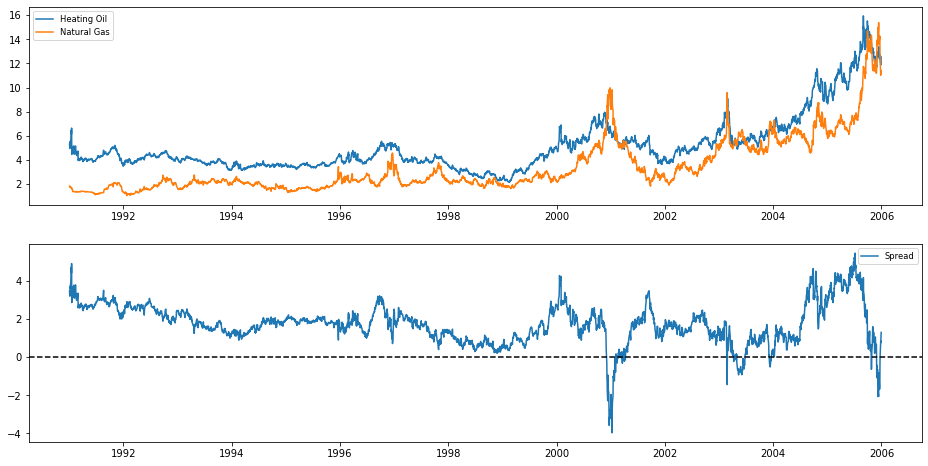

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

HO = pd.read_csv('CME_HO1.csv', parse_dates=True, index_col='Date')
NG = pd.read_csv('CME_NG1.csv', parse_dates=True, index_col='Date')

###############################################################################

# Plot the prices separately
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()


Notice from the plot that when Heating Oil briefly dipped below Natural Gas, it quickly reverted back up.

### ***A Dog on a Leash? (Part 2)***

To verify that Heating Oil and Natural Gas prices are cointegrated, first apply the Dickey-Fuller test separately to show they are random walks. Then apply the test to the difference, which should strongly reject the random walk hypothesis. The Heating Oil and Natural Gas prices are pre-loaded in DataFrames `HO` and `NG`.

* Perform the adfuller test on `HO` and on `NG` separately, and save the results (results are a list)
  The argument for adfuller must be a series, so you need to include the column `'Close'`
  * Print just the p-value (item [1] in the list)
* Do the same thing for the spread, again converting the units of `HO`, and using the column `'Close'` of each DataFrame

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

HO = pd.read_csv('CME_HO1.csv', parse_dates=True, index_col='Date').sort_index()
NG = pd.read_csv('CME_NG1.csv', parse_dates=True, index_col='Date').sort_index()

###########################################################################

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on HO is  0.9567108785017863
The p-value for the ADF test on NG is  0.9008747444676733
The p-value for the ADF test on the spread is  7.019439302142287e-05


As we expected, we cannot reject the hypothesis that the individual futures are random walks, but we can reject that the spread is a random walk.

### ***Are Bitcoin and Ethereum Cointegrated?***

Cointegration involves two steps: 

1. regressing one time series on the other to get the cointegration vector.
2. Perform an ADF test on the residuals of the regression. 

In the last example, there was no need to perform the first step since we implicitly assumed the cointegration vector was (1, -1). In other words, we took the difference between the two series (after doing a units conversion). Here, you will do both steps.

You will regress the value of one cryptocurrency, bitcoin (BTC), on another cryptocurrency, ethereum (ETH). If we call the regression coefficient $b$, then the cointegration vector is simply $(1, -b)$. Then perform the ADF test on BTC  $-b$ETH. Bitcoin and Ethereum prices are pre-loaded in DataFrames `BTC` and `ETH`.


* Import the **`statsmodels`** module for regression and the **`adfuller`** function
* Add a constant to the `ETH` DataFrame using **`sm.add_constant()`**
* Regress `BTC` on `ETH` using **`sm.OLS(y,x).fit()`**, where `y` is the dependent variable and `x` is the independent variable, and save the results in `result`.
  * The intercept is in `result.params[0]` and the slope in `result.params[1]`
* Run ADF test on BTC  $-b$ETH

In [23]:
import pandas as pd

ETH = pd.read_csv('ETH.csv', parse_dates=True, index_col='Date')
BTC = pd.read_csv('BTC.csv', parse_dates=True, index_col='Date')

##########################################################################

# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC, ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

The p-value for the ADF test is  0.023369002323472707


The data suggests that Bitcoin and Ethereum are cointegrated.

# ***Case Study***

### ***Is Temperature a Random Walk (with Drift)?***

An ARMA model is a simplistic approach to forecasting climate changes, but it illustrates many of the topics covered in this class.

The DataFrame `temp_NY` contains the average annual temperature in Central Park, NY from 1870-2016 (the data was downloaded from the [NOAA](https://www.ncdc.noaa.gov/cdo-web/search)). Plot the data and test whether it follows a random walk (with drift).

* Convert the index of years into a datetime object using **`pd.to_datetime()`**, and since the data is annual, pass the argument `format='%Y'`.
* Plot the data using **`.plot()`**
* Compute the p-value the ***Augmented Dickey Fuller*** test using the **`adfuller`** function.
* Save the results of the ADF test in result, and print out the p-value in result[1].

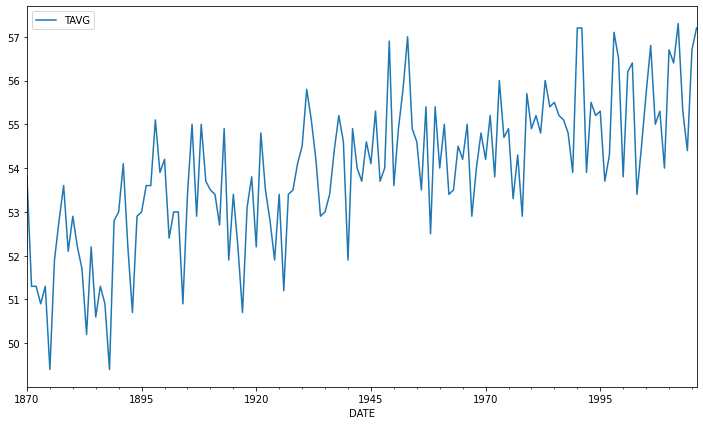

The p-value for the ADF test is  0.5832938987871142


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

temp_NY = pd.read_csv('NOAA_TAVG.csv', parse_dates=True, index_col='DATE')

###########################################################################

# Plot average temperatures
temp_NY.plot(figsize=(12, 7))
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

The data seems to follow a random walk with drift.

### ***Getting "Warmed" Up: Look at Autocorrelations***

Since the temperature series, `temp_NY`, is a random walk with drift, take first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.

* Import the modules for plotting the sample ACF and PACF
* Take first differences of the DataFrame `temp_NY` using the pandas method .**`diff()`**
* Create two subplots for plotting the ACF and PACF
  * Plot the sample ACF of the differenced series
  * Plot the sample PACF of the differenced series

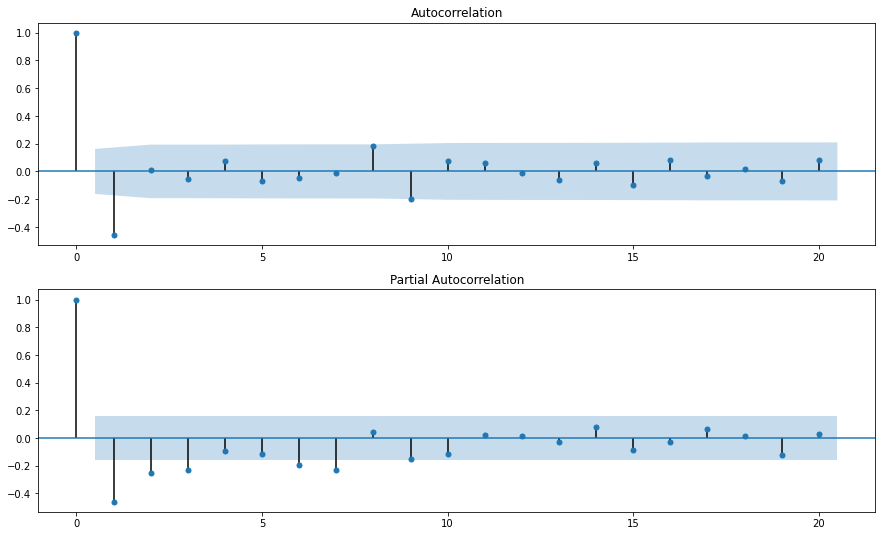

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1, figsize=(15,9))

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.

### ***Which ARMA Model is Best?***

Recall from Chapter 3 that the Akaike Information Criterion (AIC) can be used to compare models with different numbers of parameters. It measures goodness-of-fit, but places a penalty on models with more parameters to discourage overfitting. ***Lower AIC scores are better***.

Fit the temperature data to an AR(1), AR(2), and ARMA(1,1) and see which model is the best fit, using the AIC criterion. The AR(2) and ARMA(1,1) models have one more parameter than the AR(1) has.

The annual change in temperature is in a DataFrame `chg_temp`.

* For each ARMA model, create an instance of the ARMA class, passing the data and the `order=(p,q)`. `p` is the autoregressive order; `q` is the moving average order.
* Fit the model using the method **`.fit()`**.
* Print the AIC value, found in the **`.aic`** element of the results.

In [10]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(2, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(1,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for an AR(1) is:  510.534689831391
The AIC for an AR(2) is:  501.9274123160228
The AIC for an ARMA(1,1) is:  469.0729131153337


The ARMA(1,1) has the lowest AIC values among the three models.

### ***Don't Throw Out That Winter Coat Yet***

Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. In this exercise, you will use the **`ARIMA`** module on the temperature data (before differencing), which is identical to using the **`ARMA`** module on changes in temperature, followed by taking cumulative sums of these changes to get the temperature forecast.

The data is preloaded in a DataFrame called `temp_NY`.

* Create an instance of the **`ARIMA`** class called `mod` for an integrated ARMA(1,1) model
  * The `d` in `order(p,d,q)` is one, since we first differenced once
  * Fit `mod` using the **`.fit()`** method and call the results `res`
* Forecast the series using the **`plot_predict()`** method on `res`
* Choose the start date as `1872-01-01` and the end date as `2046-01-01`

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


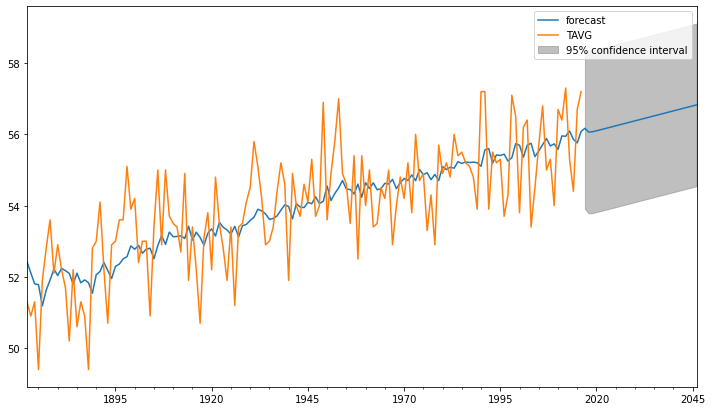

In [20]:
from statsmodels.tsa.arima_model import ARIMA

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
fig, ax = plt.subplots(figsize=(12, 7))
res.plot_predict(start='1872-01-01', end='2046-01-01', ax=ax)
plt.show()

According to the model, the temperature is expected to be about 0.6 degrees higher in 30 years (almost entirely due to the trend), but the 95% confidence interval around that is over 5 degrees.